# PW4: Genetic algorithms for optimization
*Alexandra Korukova, Samuel Mayor*  
*HEIG-VD - MLG - 30.05.2019*

In [1]:
from scipy import sin, cos, tan, arctan, arctan2, arccos, pi
import numpy as np
import math
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import GAllele
from pyevolve import Mutators
from pyevolve import Initializators
from pyevolve import DBAdapters
from pyevolve import Crossovers
from pyevolve import Consts
from pyevolve import Selectors
import sys, random
import matplotlib.pyplot as plt

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
def tour_length(matrix, tour):
   """ Returns the total length of the tour """
   total=0
   num_cities=len(tour)
   for i in range(num_cities):
      j=(i+1)%num_cities
      city_i=tour[i]
      city_j=tour[j]
      total+=matrix[city_i,city_j]
   return total

def G1DListTSPInitializator(genome, **args):
   """ The initializator for the TSP """
   genome.clearList()
   lst = [i for i in xrange(genome.getListSize())]

   for i in xrange(genome.getListSize()):
      choice = random.choice(lst)
      lst.remove(choice)
      genome.append(choice)

spherical_distances = []
coords = []

def eval_func(chromosome):
   """ The evaluation function """
   global spherical_distances
   return tour_length(spherical_distances, chromosome)

In [4]:
# source : https://www.johndcook.com/blog/python_longitude_latitude/
def spherical_distance(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc*6371

In [5]:
# creates latitude/longitude tuples for each city
coords = []
for i in range(len(LAT)):
    coords.append((LAT[i], LON[i]))

# calculate distances between each city pairs
spherical_distances = np.zeros((14, 14))
for i,c1 in enumerate(coords):
    for j,c2 in enumerate(coords):
        spherical_distances[i, j] = spherical_distance(c1[0], c1[1], c2[0], c2[1])

# set the alleles to the cities numbers
setOfAlleles = GAllele.GAlleles(homogeneous=True)
lst = [ i for i in xrange(len(coords)) ]
a = GAllele.GAlleleList(lst)
setOfAlleles.add(a)

genome = G1DList.G1DList(len(coords))
genome.setParams(allele=setOfAlleles)

genome.evaluator.set(eval_func)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverOX)
genome.initializator.set(G1DListTSPInitializator)

ga = GSimpleGA.GSimpleGA(genome)
ga.setGenerations(i)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(1.0)
ga.setMutationRate(0.03)
ga.setPopulationSize(80)

ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8176.99(8505.03)/5512.07(5198.65)/6814.15(6814.15)]
Gen. 13 (100.00%): Max/Min/Avg Fitness(Raw) [4641.11(5715.82)/3668.63(3392.19)/3867.59(3867.59)]
Total time elapsed: 0.122 seconds.
- GenomeBase
	Score:			 3392.187220
	Fitness:		 3668.625173

	Params:		 {'allele': - GAlleles
	Homogeneous:	 True
	List size:	 1
	Alleles:

Allele for 0 position:
- GAlleleList
	List size:	 14
	Allele Options:	 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

}

	Slot [Evaluator] (Count: 1)
		Name: eval_func - Weight: 0.50
		Doc:  The evaluation function 
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
		Doc:  The initializator for the TSP 
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator
   
   .. note:: this mutator is :term:`Data Type Independent`

   
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverOX - Weight: 0.50
		Doc:  The OX Crossover for G1DList  (order 

### Testing number of generations

In [6]:
nb_generations = np.arange(1, 2002, 100)
bests = []
for g in nb_generations:
    for i in np.arange(10):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(g)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(1.0)
        ga.setMutationRate(0.03)
        ga.setPopulationSize(80)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7995.48(8167.28)/5110.93(4910.85)/6662.90(6662.90)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6083.15(6449.78)/4777.85(4672.45)/5069.29(5069.29)]
Total time elapsed: 0.023 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8027.94(7908.13)/4611.55(4797.67)/6689.95(6689.95)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [5961.31(6924.76)/4665.54(4372.47)/4967.76(4967.76)]
Total time elapsed: 0.022 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7984.73(8156.76)/5213.87(5027.71)/6653.94(6653.94)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6264.32(6575.67)/4849.98(4739.55)/5220.27(5220.27)]
Total time elapsed: 0.032 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8040.85(8745.82)/5588.11(5002.83)/6700.71(6700.71)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6334.68(6955.93)/4867.06(4624.72)/5278.90(5278.90)]
Total time elapsed: 0.027 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8055.25(8176.60)/5064.36(4915.36)/6712.70(6712.70)]
Gen. 1

Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4804.69(6933.44)/3889.98(3587.12)/4003.91(4003.91)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4638.95(6539.55)/3752.45(3473.82)/3865.79(3865.79)]
Total time elapsed: 1.436 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8138.67(8667.26)/5396.19(4856.06)/6782.22(6782.22)]
Gen. 100 (49.75%): Max/Min/Avg Fitness(Raw) [4480.54(6145.18)/3647.80(3456.13)/3733.79(3733.79)]
Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4648.29(6693.37)/3758.89(3456.13)/3873.58(3873.58)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4493.11(5903.48)/3644.33(3456.13)/3744.26(3744.26)]
Total time elapsed: 1.449 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7969.83(8672.88)/5064.80(4230.27)/6641.53(6641.53)]
Gen. 100 (49.75%): Max/Min/Avg Fitness(Raw) [4806.91(6128.65)/3867.83(3640.27)/4005.76(4005.76)]
Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4810.84(6362.61)/3883.40(3640.27)/4009.03(4009.03)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4791.17(6128.65

Gen. 300 (74.81%): Max/Min/Avg Fitness(Raw) [4627.23(5920.39)/3722.26(3497.97)/3856.02(3856.02)]
Gen. 400 (99.75%): Max/Min/Avg Fitness(Raw) [4613.45(5920.39)/3716.17(3497.97)/3844.54(3844.54)]
Gen. 401 (100.00%): Max/Min/Avg Fitness(Raw) [4831.85(6565.47)/3858.89(3497.97)/4026.54(4026.54)]
Total time elapsed: 3.307 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8027.53(8108.38)/4941.17(4835.51)/6689.61(6689.61)]
Gen. 100 (24.94%): Max/Min/Avg Fitness(Raw) [4667.95(5905.43)/3770.60(3580.75)/3889.96(3889.96)]
Gen. 200 (49.88%): Max/Min/Avg Fitness(Raw) [4641.66(5983.36)/3762.98(3580.75)/3868.05(3868.05)]
Gen. 300 (74.81%): Max/Min/Avg Fitness(Raw) [4364.07(5791.55)/3554.18(3392.19)/3636.73(3636.73)]
Gen. 400 (99.75%): Max/Min/Avg Fitness(Raw) [4390.11(5791.55)/3567.10(3392.19)/3658.43(3658.43)]
Gen. 401 (100.00%): Max/Min/Avg Fitness(Raw) [4438.39(5584.10)/3578.42(3392.19)/3698.66(3698.66)]
Total time elapsed: 2.923 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8118.62(8590.05)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8002.93(8327.87)/5361.73(5043.24)/6669.10(6669.10)]
Gen. 100 (19.96%): Max/Min/Avg Fitness(Raw) [4631.15(6393.44)/3705.55(3354.52)/3859.29(3859.29)]
Gen. 200 (39.92%): Max/Min/Avg Fitness(Raw) [4608.38(6578.71)/3704.06(3354.52)/3840.32(3840.32)]
Gen. 300 (59.88%): Max/Min/Avg Fitness(Raw) [4673.88(6431.76)/3728.97(3354.52)/3894.90(3894.90)]
Gen. 400 (79.84%): Max/Min/Avg Fitness(Raw) [4335.00(5961.95)/3533.17(3354.52)/3612.50(3612.50)]
Gen. 500 (99.80%): Max/Min/Avg Fitness(Raw) [4570.65(6186.62)/3663.31(3354.52)/3808.87(3808.87)]
Gen. 501 (100.00%): Max/Min/Avg Fitness(Raw) [4438.52(6614.04)/3611.41(3354.52)/3698.77(3698.77)]
Total time elapsed: 3.563 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8217.08(8077.79)/4887.32(5086.69)/6847.57(6847.57)]
Gen. 100 (19.96%): Max/Min/Avg Fitness(Raw) [4531.45(6223.52)/3657.70(3392.19)/3776.21(3776.21)]
Gen. 200 (39.92%): Max/Min/Avg Fitness(Raw) [4593.77(7101.71)/3726.18(3392.19)/3828.14(3828.14)]


Gen. 600 (99.83%): Max/Min/Avg Fitness(Raw) [4831.51(6260.18)/3934.54(3771.80)/4026.26(4026.26)]
Gen. 601 (100.00%): Max/Min/Avg Fitness(Raw) [4961.24(7082.97)/4032.69(3771.80)/4134.37(4134.37)]
Total time elapsed: 4.210 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8055.57(8463.17)/5444.15(5058.95)/6712.98(6712.98)]
Gen. 100 (16.64%): Max/Min/Avg Fitness(Raw) [4575.09(5584.10)/3631.63(3392.19)/3812.57(3812.57)]
Gen. 200 (33.28%): Max/Min/Avg Fitness(Raw) [4403.66(5970.98)/3581.20(3392.19)/3669.72(3669.72)]
Gen. 300 (49.92%): Max/Min/Avg Fitness(Raw) [4676.47(6836.70)/3763.20(3392.19)/3897.06(3897.06)]
Gen. 400 (66.56%): Max/Min/Avg Fitness(Raw) [4583.09(5791.55)/3653.85(3392.19)/3819.24(3819.24)]
Gen. 500 (83.19%): Max/Min/Avg Fitness(Raw) [4562.18(5791.55)/3645.28(3392.19)/3801.82(3801.82)]
Gen. 600 (99.83%): Max/Min/Avg Fitness(Raw) [4490.09(5880.57)/3619.44(3392.19)/3741.74(3741.74)]
Gen. 601 (100.00%): Max/Min/Avg Fitness(Raw) [4468.11(5895.18)/3609.85(3392.19)/3723.43(3723.4

Gen. 200 (28.53%): Max/Min/Avg Fitness(Raw) [4581.06(6902.68)/3712.28(3392.19)/3817.55(3817.55)]
Gen. 300 (42.80%): Max/Min/Avg Fitness(Raw) [4548.14(5814.61)/3641.12(3392.19)/3790.12(3790.12)]
Gen. 400 (57.06%): Max/Min/Avg Fitness(Raw) [4454.09(5872.52)/3601.96(3392.19)/3711.74(3711.74)]
Gen. 500 (71.33%): Max/Min/Avg Fitness(Raw) [4605.36(6343.14)/3701.28(3392.19)/3837.80(3837.80)]
Gen. 600 (85.59%): Max/Min/Avg Fitness(Raw) [4544.49(5836.96)/3641.17(3392.19)/3787.08(3787.08)]
Gen. 700 (99.86%): Max/Min/Avg Fitness(Raw) [4482.98(5880.57)/3616.11(3392.19)/3735.81(3735.81)]
Gen. 701 (100.00%): Max/Min/Avg Fitness(Raw) [4500.00(5814.61)/3620.02(3392.19)/3750.00(3750.00)]
Total time elapsed: 4.970 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8196.55(8499.60)/5261.83(4913.85)/6830.46(6830.46)]
Gen. 100 (14.27%): Max/Min/Avg Fitness(Raw) [5552.15(6604.55)/4480.32(4313.73)/4626.79(4626.79)]
Gen. 200 (28.53%): Max/Min/Avg Fitness(Raw) [5361.50(7356.91)/4329.24(4019.57)/4467.92(4467.92

Gen. 801 (100.00%): Max/Min/Avg Fitness(Raw) [4618.73(5903.18)/3679.35(3396.36)/3848.94(3848.94)]
Total time elapsed: 5.907 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8019.08(8465.50)/5457.16(5047.85)/6682.57(6682.57)]
Gen. 100 (12.48%): Max/Min/Avg Fitness(Raw) [4552.32(6151.49)/3698.47(3497.97)/3793.60(3793.60)]
Gen. 200 (24.97%): Max/Min/Avg Fitness(Raw) [4506.35(6176.46)/3675.47(3497.97)/3755.29(3755.29)]
Gen. 300 (37.45%): Max/Min/Avg Fitness(Raw) [4562.12(6159.86)/3703.81(3497.97)/3801.76(3801.76)]
Gen. 400 (49.94%): Max/Min/Avg Fitness(Raw) [4677.65(7103.79)/3800.75(3497.97)/3898.04(3898.04)]
Gen. 500 (62.42%): Max/Min/Avg Fitness(Raw) [4520.65(5945.32)/3674.07(3497.97)/3767.20(3767.20)]
Gen. 600 (74.91%): Max/Min/Avg Fitness(Raw) [4593.54(5945.32)/3708.64(3497.97)/3827.95(3827.95)]
Gen. 700 (87.39%): Max/Min/Avg Fitness(Raw) [4545.54(5822.66)/3679.98(3497.97)/3787.95(3787.95)]
Gen. 800 (99.88%): Max/Min/Avg Fitness(Raw) [4642.00(6234.59)/3747.24(3497.97)/3868.33(3868.33

Gen. 901 (100.00%): Max/Min/Avg Fitness(Raw) [4498.85(6432.16)/3638.79(3354.52)/3749.04(3749.04)]
Total time elapsed: 6.378 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8089.15(8353.79)/5230.26(4933.72)/6740.96(6740.96)]
Gen. 100 (11.10%): Max/Min/Avg Fitness(Raw) [4819.66(6095.37)/3816.08(3497.97)/4016.39(4016.39)]
Gen. 200 (22.20%): Max/Min/Avg Fitness(Raw) [4589.89(5948.77)/3707.15(3497.97)/3824.91(3824.91)]
Gen. 300 (33.30%): Max/Min/Avg Fitness(Raw) [4439.25(5219.92)/3601.38(3497.97)/3699.38(3699.38)]
Gen. 400 (44.40%): Max/Min/Avg Fitness(Raw) [4501.27(5897.33)/3662.59(3497.97)/3751.06(3751.06)]
Gen. 500 (55.49%): Max/Min/Avg Fitness(Raw) [4776.66(7269.44)/3863.74(3497.97)/3980.55(3980.55)]
Gen. 600 (66.59%): Max/Min/Avg Fitness(Raw) [4664.56(6196.53)/3756.13(3497.97)/3887.14(3887.14)]
Gen. 700 (77.69%): Max/Min/Avg Fitness(Raw) [4518.50(5920.39)/3671.95(3497.97)/3765.42(3765.42)]
Gen. 800 (88.79%): Max/Min/Avg Fitness(Raw) [4578.30(6351.51)/3719.79(3497.97)/3815.25(3815.25

Gen. 400 (44.40%): Max/Min/Avg Fitness(Raw) [4467.62(6036.77)/3617.90(3396.36)/3723.02(3723.02)]
Gen. 500 (55.49%): Max/Min/Avg Fitness(Raw) [4538.52(5848.16)/3640.88(3396.36)/3782.10(3782.10)]
Gen. 600 (66.59%): Max/Min/Avg Fitness(Raw) [4535.41(6759.47)/3682.32(3396.36)/3779.51(3779.51)]
Gen. 700 (77.69%): Max/Min/Avg Fitness(Raw) [4359.41(5721.05)/3550.56(3396.36)/3632.84(3632.84)]
Gen. 800 (88.79%): Max/Min/Avg Fitness(Raw) [4589.66(5818.78)/3660.39(3396.36)/3824.71(3824.71)]
Gen. 900 (99.89%): Max/Min/Avg Fitness(Raw) [4423.37(5721.05)/3581.16(3396.36)/3686.14(3686.14)]
Gen. 901 (100.00%): Max/Min/Avg Fitness(Raw) [4403.31(5671.10)/3569.31(3396.36)/3669.43(3669.43)]
Total time elapsed: 6.280 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8180.61(8242.44)/5313.58(5245.40)/6817.18(6817.18)]
Gen. 100 (9.99%): Max/Min/Avg Fitness(Raw) [4693.39(6834.70)/3773.42(3396.36)/3911.16(3911.16)]
Gen. 200 (19.98%): Max/Min/Avg Fitness(Raw) [4723.83(5890.65)/3718.90(3396.36)/3936.53(3936.53)

Gen. 300 (29.97%): Max/Min/Avg Fitness(Raw) [4414.39(6378.15)/3601.72(3396.36)/3678.65(3678.65)]
Gen. 400 (39.96%): Max/Min/Avg Fitness(Raw) [4534.71(6840.93)/3684.50(3396.36)/3778.92(3778.92)]
Gen. 500 (49.95%): Max/Min/Avg Fitness(Raw) [4563.75(6294.50)/3678.94(3396.36)/3803.12(3803.12)]
Gen. 600 (59.94%): Max/Min/Avg Fitness(Raw) [4570.66(6400.34)/3687.62(3396.36)/3808.88(3808.88)]
Gen. 700 (69.93%): Max/Min/Avg Fitness(Raw) [4567.99(6670.05)/3697.57(3396.36)/3806.66(3806.66)]
Gen. 800 (79.92%): Max/Min/Avg Fitness(Raw) [4600.48(5845.89)/3667.07(3396.36)/3833.74(3833.74)]
Gen. 900 (89.91%): Max/Min/Avg Fitness(Raw) [4479.67(5355.42)/3578.11(3396.36)/3733.06(3733.06)]
Gen. 1000 (99.90%): Max/Min/Avg Fitness(Raw) [4436.70(5884.74)/3595.54(3396.36)/3697.25(3697.25)]
Gen. 1001 (100.00%): Max/Min/Avg Fitness(Raw) [4438.35(5721.05)/3588.07(3396.36)/3698.63(3698.63)]
Total time elapsed: 7.181 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8149.89(8274.16)/5068.34(4910.68)/6791.58(6791.

Gen. 1101 (100.00%): Max/Min/Avg Fitness(Raw) [4565.61(6428.06)/3686.24(3396.36)/3804.67(3804.67)]
Total time elapsed: 8.384 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8007.56(8607.84)/5549.13(5043.65)/6672.97(6672.97)]
Gen. 100 (9.08%): Max/Min/Avg Fitness(Raw) [4840.65(7058.08)/3894.08(3509.84)/4033.87(4033.87)]
Gen. 200 (18.17%): Max/Min/Avg Fitness(Raw) [4697.68(6608.61)/3797.06(3509.84)/3914.74(3914.74)]
Gen. 300 (27.25%): Max/Min/Avg Fitness(Raw) [4484.20(6682.56)/3639.83(3354.52)/3736.83(3736.83)]
Gen. 400 (36.33%): Max/Min/Avg Fitness(Raw) [4495.90(7047.48)/3657.58(3354.52)/3746.58(3746.58)]
Gen. 500 (45.41%): Max/Min/Avg Fitness(Raw) [4422.08(5753.88)/3567.31(3354.52)/3685.07(3685.07)]
Gen. 600 (54.50%): Max/Min/Avg Fitness(Raw) [4574.73(6295.68)/3671.74(3354.52)/3812.28(3812.28)]
Gen. 700 (63.58%): Max/Min/Avg Fitness(Raw) [4386.77(5741.89)/3550.11(3354.52)/3655.64(3655.64)]
Gen. 800 (72.66%): Max/Min/Avg Fitness(Raw) [4516.65(6156.52)/3635.08(3354.52)/3763.87(3763.87

Gen. 300 (27.25%): Max/Min/Avg Fitness(Raw) [4658.14(6278.59)/3724.55(3396.36)/3881.78(3881.78)]
Gen. 400 (36.33%): Max/Min/Avg Fitness(Raw) [4315.80(5561.06)/3523.22(3396.36)/3596.50(3596.50)]
Gen. 500 (45.41%): Max/Min/Avg Fitness(Raw) [4562.45(5843.71)/3650.95(3396.36)/3802.05(3802.05)]
Gen. 600 (54.50%): Max/Min/Avg Fitness(Raw) [4512.05(6759.80)/3668.87(3396.36)/3760.04(3760.04)]
Gen. 700 (63.58%): Max/Min/Avg Fitness(Raw) [4469.67(5818.78)/3607.91(3396.36)/3724.73(3724.73)]
Gen. 800 (72.66%): Max/Min/Avg Fitness(Raw) [4290.79(6122.76)/3525.32(3396.36)/3575.66(3575.66)]
Gen. 900 (81.74%): Max/Min/Avg Fitness(Raw) [4524.00(6774.86)/3676.24(3396.36)/3770.00(3770.00)]
Gen. 1000 (90.83%): Max/Min/Avg Fitness(Raw) [4560.97(5884.74)/3653.28(3396.36)/3800.81(3800.81)]
Gen. 1100 (99.91%): Max/Min/Avg Fitness(Raw) [4416.92(6159.27)/3596.29(3396.36)/3680.76(3680.76)]
Gen. 1101 (100.00%): Max/Min/Avg Fitness(Raw) [4558.32(7560.83)/3717.38(3396.36)/3798.60(3798.60)]
Total time elapsed: 7.611 

Gen. 300 (24.98%): Max/Min/Avg Fitness(Raw) [4915.75(6482.40)/3890.95(3497.97)/4096.46(4096.46)]
Gen. 400 (33.31%): Max/Min/Avg Fitness(Raw) [4423.43(5897.33)/3623.43(3497.97)/3686.19(3686.19)]
Gen. 500 (41.63%): Max/Min/Avg Fitness(Raw) [4498.99(5987.42)/3665.01(3497.97)/3749.16(3749.16)]
Gen. 600 (49.96%): Max/Min/Avg Fitness(Raw) [4423.82(5848.80)/3622.23(3497.97)/3686.52(3686.52)]
Gen. 700 (58.28%): Max/Min/Avg Fitness(Raw) [4553.82(5986.35)/3692.03(3497.97)/3794.85(3794.85)]
Gen. 800 (66.61%): Max/Min/Avg Fitness(Raw) [4676.59(6415.18)/3773.59(3497.97)/3897.16(3897.16)]
Gen. 900 (74.94%): Max/Min/Avg Fitness(Raw) [4548.73(5945.32)/3687.65(3497.97)/3790.61(3790.61)]
Gen. 1000 (83.26%): Max/Min/Avg Fitness(Raw) [4576.00(6070.62)/3706.78(3497.97)/3813.33(3813.33)]
Gen. 1100 (91.59%): Max/Min/Avg Fitness(Raw) [4606.75(5920.39)/3713.18(3497.97)/3838.96(3838.96)]
Gen. 1200 (99.92%): Max/Min/Avg Fitness(Raw) [4642.01(5822.66)/3721.72(3497.97)/3868.34(3868.34)]
Gen. 1201 (100.00%): Max/Mi

Gen. 100 (7.69%): Max/Min/Avg Fitness(Raw) [4728.13(6051.08)/3823.84(3628.66)/3940.11(3940.11)]
Gen. 200 (15.37%): Max/Min/Avg Fitness(Raw) [4569.82(6345.68)/3684.58(3396.36)/3808.19(3808.19)]
Gen. 300 (23.06%): Max/Min/Avg Fitness(Raw) [4333.08(5905.70)/3543.38(3396.36)/3610.90(3610.90)]
Gen. 400 (30.75%): Max/Min/Avg Fitness(Raw) [4587.58(6633.63)/3706.93(3396.36)/3822.98(3822.98)]
Gen. 500 (38.43%): Max/Min/Avg Fitness(Raw) [4650.03(6509.05)/3734.19(3396.36)/3875.03(3875.03)]
Gen. 600 (46.12%): Max/Min/Avg Fitness(Raw) [4506.41(6184.87)/3644.37(3396.36)/3755.34(3755.34)]
Gen. 700 (53.80%): Max/Min/Avg Fitness(Raw) [4502.43(6652.15)/3660.00(3396.36)/3752.02(3752.02)]
Gen. 800 (61.49%): Max/Min/Avg Fitness(Raw) [4496.92(6397.73)/3648.15(3396.36)/3747.43(3747.43)]
Gen. 900 (69.18%): Max/Min/Avg Fitness(Raw) [4305.69(5561.06)/3518.34(3396.36)/3588.07(3588.07)]
Gen. 1000 (76.86%): Max/Min/Avg Fitness(Raw) [4636.87(6967.96)/3747.61(3396.36)/3864.06(3864.06)]
Gen. 1100 (84.55%): Max/Min/Av

Gen. 900 (69.18%): Max/Min/Avg Fitness(Raw) [4459.26(5843.71)/3604.38(3396.36)/3716.05(3716.05)]
Gen. 1000 (76.86%): Max/Min/Avg Fitness(Raw) [4547.92(6428.06)/3676.85(3396.36)/3789.93(3789.93)]
Gen. 1100 (84.55%): Max/Min/Avg Fitness(Raw) [4566.48(6797.53)/3701.36(3396.36)/3805.40(3805.40)]
Gen. 1200 (92.24%): Max/Min/Avg Fitness(Raw) [4461.27(6315.63)/3625.75(3396.36)/3717.73(3717.73)]
Gen. 1300 (99.92%): Max/Min/Avg Fitness(Raw) [4533.35(5843.71)/3638.29(3396.36)/3777.79(3777.79)]
Gen. 1301 (100.00%): Max/Min/Avg Fitness(Raw) [4501.91(6445.02)/3652.64(3396.36)/3751.59(3751.59)]
Total time elapsed: 9.847 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7980.80(8462.14)/5371.97(4909.25)/6650.66(6650.66)]
Gen. 100 (7.69%): Max/Min/Avg Fitness(Raw) [4420.54(7564.12)/3621.27(3354.52)/3683.79(3683.79)]
Gen. 200 (15.37%): Max/Min/Avg Fitness(Raw) [4423.91(6452.30)/3598.06(3354.52)/3686.59(3686.59)]
Gen. 300 (23.06%): Max/Min/Avg Fitness(Raw) [4395.95(5842.90)/3559.50(3354.52)/3663.29(366

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8114.15(8267.65)/4779.89(4554.93)/6761.79(6761.79)]
Gen. 100 (7.14%): Max/Min/Avg Fitness(Raw) [4771.74(6567.22)/3886.99(3685.02)/3976.45(3976.45)]
Gen. 200 (14.28%): Max/Min/Avg Fitness(Raw) [4640.19(5721.00)/3791.00(3685.02)/3866.83(3866.83)]
Gen. 300 (21.41%): Max/Min/Avg Fitness(Raw) [4844.91(6107.44)/3899.96(3685.02)/4037.42(4037.42)]
Gen. 400 (28.55%): Max/Min/Avg Fitness(Raw) [4962.18(6673.62)/3988.50(3685.02)/4135.15(4135.15)]
Gen. 500 (35.69%): Max/Min/Avg Fitness(Raw) [4751.80(6173.40)/3861.51(3685.02)/3959.83(3959.83)]
Gen. 600 (42.83%): Max/Min/Avg Fitness(Raw) [4739.49(6173.40)/3855.60(3685.02)/3949.58(3949.58)]
Gen. 700 (49.96%): Max/Min/Avg Fitness(Raw) [4921.94(6457.04)/3956.53(3685.02)/4101.62(4101.62)]
Gen. 800 (57.10%): Max/Min/Avg Fitness(Raw) [4723.68(6084.38)/3844.26(3685.02)/3936.40(3936.40)]
Gen. 900 (64.24%): Max/Min/Avg Fitness(Raw) [4675.94(5772.99)/3808.73(3685.02)/3896.61(3896.61)]
Gen. 1000 (71.38%): Max/Min/Avg Fi

Gen. 300 (21.41%): Max/Min/Avg Fitness(Raw) [4532.91(6037.20)/3636.04(3354.52)/3777.42(3777.42)]
Gen. 400 (28.55%): Max/Min/Avg Fitness(Raw) [4615.79(7551.64)/3744.34(3354.52)/3846.49(3846.49)]
Gen. 500 (35.69%): Max/Min/Avg Fitness(Raw) [4669.89(6664.95)/3740.86(3354.52)/3891.58(3891.58)]
Gen. 600 (42.83%): Max/Min/Avg Fitness(Raw) [4475.01(6820.08)/3638.77(3354.52)/3729.18(3729.18)]
Gen. 700 (49.96%): Max/Min/Avg Fitness(Raw) [4557.67(5812.83)/3630.83(3354.52)/3798.05(3798.05)]
Gen. 800 (57.10%): Max/Min/Avg Fitness(Raw) [4443.84(6548.60)/3612.44(3354.52)/3703.20(3703.20)]
Gen. 900 (64.24%): Max/Min/Avg Fitness(Raw) [4499.07(5842.90)/3607.86(3354.52)/3749.23(3749.23)]
Gen. 1000 (71.38%): Max/Min/Avg Fitness(Raw) [4487.72(5784.15)/3598.82(3354.52)/3739.77(3739.77)]
Gen. 1100 (78.52%): Max/Min/Avg Fitness(Raw) [4430.87(6231.29)/3594.12(3354.52)/3692.39(3692.39)]
Gen. 1200 (85.65%): Max/Min/Avg Fitness(Raw) [4388.83(5842.90)/3556.00(3354.52)/3657.36(3657.36)]
Gen. 1300 (92.79%): Max/Min

Gen. 400 (26.65%): Max/Min/Avg Fitness(Raw) [4455.01(6409.25)/3625.46(3396.36)/3712.50(3712.50)]
Gen. 500 (33.31%): Max/Min/Avg Fitness(Raw) [4427.89(5795.72)/3587.03(3396.36)/3689.90(3689.90)]
Gen. 600 (39.97%): Max/Min/Avg Fitness(Raw) [4440.12(6193.10)/3609.94(3396.36)/3700.10(3700.10)]
Gen. 700 (46.64%): Max/Min/Avg Fitness(Raw) [4669.84(5818.78)/3691.56(3396.36)/3891.53(3891.53)]
Gen. 800 (53.30%): Max/Min/Avg Fitness(Raw) [4393.26(6198.27)/3584.67(3396.36)/3661.05(3661.05)]
Gen. 900 (59.96%): Max/Min/Avg Fitness(Raw) [4680.76(5884.74)/3702.36(3396.36)/3900.64(3900.64)]
Gen. 1000 (66.62%): Max/Min/Avg Fitness(Raw) [4478.95(5884.74)/3615.89(3396.36)/3732.46(3732.46)]
Gen. 1100 (73.28%): Max/Min/Avg Fitness(Raw) [4660.29(6846.04)/3755.84(3396.36)/3883.58(3883.58)]
Gen. 1200 (79.95%): Max/Min/Avg Fitness(Raw) [4386.89(5721.05)/3563.92(3396.36)/3655.74(3655.74)]
Gen. 1300 (86.61%): Max/Min/Avg Fitness(Raw) [4457.55(5884.74)/3605.67(3396.36)/3714.62(3714.62)]
Gen. 1400 (93.27%): Max/Mi

Gen. 200 (13.32%): Max/Min/Avg Fitness(Raw) [4802.36(6230.55)/3908.66(3742.17)/4001.96(4001.96)]
Gen. 300 (19.99%): Max/Min/Avg Fitness(Raw) [4900.91(6230.55)/3953.98(3742.17)/4084.09(4084.09)]
Gen. 400 (26.65%): Max/Min/Avg Fitness(Raw) [4852.07(6761.68)/3953.78(3742.17)/4043.39(4043.39)]
Gen. 500 (33.31%): Max/Min/Avg Fitness(Raw) [5029.32(6189.52)/4002.80(3742.17)/4191.10(4191.10)]
Gen. 600 (39.97%): Max/Min/Avg Fitness(Raw) [4797.90(6433.38)/3914.16(3742.17)/3998.25(3998.25)]
Gen. 700 (46.64%): Max/Min/Avg Fitness(Raw) [4869.96(6085.40)/3931.72(3742.17)/4058.30(4058.30)]
Gen. 800 (53.30%): Max/Min/Avg Fitness(Raw) [4777.26(5578.63)/3862.00(3742.17)/3981.05(3981.05)]
Gen. 900 (59.96%): Max/Min/Avg Fitness(Raw) [4336.19(5650.00)/3536.44(3396.36)/3613.49(3613.49)]
Gen. 1000 (66.62%): Max/Min/Avg Fitness(Raw) [4465.14(6051.91)/3617.32(3396.36)/3720.95(3720.95)]
Gen. 1100 (73.28%): Max/Min/Avg Fitness(Raw) [4519.20(5431.65)/3598.85(3396.36)/3766.00(3766.00)]
Gen. 1200 (79.95%): Max/Min/

Gen. 1600 (99.94%): Max/Min/Avg Fitness(Raw) [4596.27(6141.66)/3706.24(3456.13)/3830.22(3830.22)]
Gen. 1601 (100.00%): Max/Min/Avg Fitness(Raw) [4563.54(6170.91)/3691.55(3456.13)/3802.95(3802.95)]
Total time elapsed: 12.823 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8235.13(8403.10)/5813.23(5684.80)/6862.61(6862.61)]
Gen. 100 (6.25%): Max/Min/Avg Fitness(Raw) [4648.78(7125.46)/3759.18(3392.19)/3873.99(3873.99)]
Gen. 200 (12.49%): Max/Min/Avg Fitness(Raw) [4584.04(7030.35)/3718.21(3392.19)/3820.03(3820.03)]
Gen. 300 (18.74%): Max/Min/Avg Fitness(Raw) [4561.03(6323.07)/3677.69(3392.19)/3800.86(3800.86)]
Gen. 400 (24.98%): Max/Min/Avg Fitness(Raw) [4671.34(5880.57)/3696.71(3392.19)/3892.78(3892.78)]
Gen. 500 (31.23%): Max/Min/Avg Fitness(Raw) [4468.20(7161.99)/3651.74(3392.19)/3723.50(3723.50)]
Gen. 600 (37.48%): Max/Min/Avg Fitness(Raw) [4648.89(6629.21)/3738.56(3392.19)/3874.07(3874.07)]
Gen. 700 (43.72%): Max/Min/Avg Fitness(Raw) [4366.84(6085.74)/3565.61(3392.19)/3639.04(3639.

Gen. 900 (56.21%): Max/Min/Avg Fitness(Raw) [4391.40(6011.21)/3564.59(3354.52)/3659.50(3659.50)]
Gen. 1000 (62.46%): Max/Min/Avg Fitness(Raw) [4526.76(6188.02)/3641.82(3354.52)/3772.30(3772.30)]
Gen. 1100 (68.71%): Max/Min/Avg Fitness(Raw) [4559.66(5776.94)/3628.61(3354.52)/3799.72(3799.72)]
Gen. 1200 (74.95%): Max/Min/Avg Fitness(Raw) [4528.93(5931.17)/3627.28(3354.52)/3774.11(3774.11)]
Gen. 1300 (81.20%): Max/Min/Avg Fitness(Raw) [4497.24(6107.51)/3622.82(3354.52)/3747.70(3747.70)]
Gen. 1400 (87.45%): Max/Min/Avg Fitness(Raw) [4522.07(7568.46)/3686.31(3354.52)/3768.40(3768.40)]
Gen. 1500 (93.69%): Max/Min/Avg Fitness(Raw) [4522.22(7077.50)/3674.22(3354.52)/3768.52(3768.52)]
Gen. 1600 (99.94%): Max/Min/Avg Fitness(Raw) [4403.49(6887.90)/3597.73(3354.52)/3669.58(3669.58)]
Gen. 1601 (100.00%): Max/Min/Avg Fitness(Raw) [4429.55(6209.79)/3592.57(3354.52)/3691.29(3691.29)]
Total time elapsed: 11.217 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8050.77(8415.83)/5147.23(4722.33)/6708.9

Gen. 100 (5.88%): Max/Min/Avg Fitness(Raw) [4504.22(7161.99)/3688.02(3456.13)/3753.52(3753.52)]
Gen. 200 (11.76%): Max/Min/Avg Fitness(Raw) [4583.83(6549.97)/3718.08(3456.13)/3819.86(3819.86)]
Gen. 300 (17.64%): Max/Min/Avg Fitness(Raw) [4709.84(6440.92)/3778.63(3456.13)/3924.87(3924.87)]
Gen. 400 (23.52%): Max/Min/Avg Fitness(Raw) [4717.28(6380.97)/3778.65(3456.13)/3931.06(3931.06)]
Gen. 500 (29.39%): Max/Min/Avg Fitness(Raw) [4730.61(6977.33)/3815.92(3456.13)/3942.18(3942.18)]
Gen. 600 (35.27%): Max/Min/Avg Fitness(Raw) [4566.99(7017.53)/3722.95(3456.13)/3805.82(3805.82)]
Gen. 700 (41.15%): Max/Min/Avg Fitness(Raw) [4517.46(6287.14)/3672.50(3456.13)/3764.55(3764.55)]
Gen. 800 (47.03%): Max/Min/Avg Fitness(Raw) [4530.90(6469.82)/3686.16(3456.13)/3775.75(3775.75)]
Gen. 900 (52.91%): Max/Min/Avg Fitness(Raw) [4570.86(5828.94)/3675.95(3456.13)/3809.05(3809.05)]
Gen. 1000 (58.79%): Max/Min/Avg Fitness(Raw) [4517.89(5903.48)/3656.19(3456.13)/3764.91(3764.91)]
Gen. 1100 (64.67%): Max/Min/Av

Gen. 800 (47.03%): Max/Min/Avg Fitness(Raw) [4530.67(7111.76)/3680.26(3354.52)/3775.56(3775.56)]
Gen. 900 (52.91%): Max/Min/Avg Fitness(Raw) [4521.96(6248.89)/3642.59(3354.52)/3768.30(3768.30)]
Gen. 1000 (58.79%): Max/Min/Avg Fitness(Raw) [4412.77(6347.00)/3588.39(3354.52)/3677.31(3677.31)]
Gen. 1100 (64.67%): Max/Min/Avg Fitness(Raw) [4619.49(7428.12)/3743.06(3354.52)/3849.57(3849.57)]
Gen. 1200 (70.55%): Max/Min/Avg Fitness(Raw) [4390.43(5838.74)/3556.60(3354.52)/3658.69(3658.69)]
Gen. 1300 (76.43%): Max/Min/Avg Fitness(Raw) [4456.23(6060.48)/3599.92(3354.52)/3713.53(3713.53)]
Gen. 1400 (82.30%): Max/Min/Avg Fitness(Raw) [4320.31(6743.24)/3543.96(3354.52)/3600.26(3600.26)]
Gen. 1500 (88.18%): Max/Min/Avg Fitness(Raw) [4449.03(6277.97)/3605.69(3354.52)/3707.52(3707.52)]
Gen. 1600 (94.06%): Max/Min/Avg Fitness(Raw) [4435.50(6361.56)/3601.47(3354.52)/3696.25(3696.25)]
Gen. 1700 (99.94%): Max/Min/Avg Fitness(Raw) [4346.42(6450.81)/3553.52(3354.52)/3622.02(3622.02)]
Gen. 1701 (100.00%): M

Gen. 1500 (88.18%): Max/Min/Avg Fitness(Raw) [4593.39(5851.75)/3664.62(3396.36)/3827.83(3827.83)]
Gen. 1600 (94.06%): Max/Min/Avg Fitness(Raw) [4449.79(5865.73)/3600.98(3396.36)/3708.16(3708.16)]
Gen. 1700 (99.94%): Max/Min/Avg Fitness(Raw) [4685.95(5843.71)/3700.08(3396.36)/3904.96(3904.96)]
Gen. 1701 (100.00%): Max/Min/Avg Fitness(Raw) [4583.98(6963.60)/3717.03(3396.36)/3819.99(3819.99)]
Total time elapsed: 12.024 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8096.88(8394.80)/5293.62(4972.67)/6747.40(6747.40)]
Gen. 100 (5.55%): Max/Min/Avg Fitness(Raw) [4751.23(7812.28)/3855.93(3456.13)/3959.36(3959.36)]
Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4530.10(5903.48)/3661.94(3456.13)/3775.09(3775.09)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4576.57(6621.01)/3716.62(3456.13)/3813.81(3813.81)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4549.62(6390.97)/3693.57(3456.13)/3791.35(3791.35)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4591.18(5878.55)/3688.10(3456.13)/3825.98(382

Gen. 1801 (100.00%): Max/Min/Avg Fitness(Raw) [4504.34(6264.22)/3646.79(3396.36)/3753.61(3753.61)]
Total time elapsed: 12.868 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8079.43(8413.15)/5800.48(5569.41)/6732.86(6732.86)]
Gen. 100 (5.55%): Max/Min/Avg Fitness(Raw) [4519.63(5814.61)/3628.75(3392.19)/3766.36(3766.36)]
Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4544.06(6301.74)/3667.91(3392.19)/3786.72(3786.72)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4365.77(5486.69)/3541.33(3392.19)/3638.14(3638.14)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4444.81(5814.61)/3594.56(3392.19)/3704.01(3704.01)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4502.52(5814.61)/3621.15(3392.19)/3752.10(3752.10)]
Gen. 600 (33.31%): Max/Min/Avg Fitness(Raw) [4360.03(5814.61)/3553.01(3392.19)/3633.36(3633.36)]
Gen. 700 (38.87%): Max/Min/Avg Fitness(Raw) [4405.70(5772.62)/3573.84(3392.19)/3671.41(3671.41)]
Gen. 800 (44.42%): Max/Min/Avg Fitness(Raw) [4424.60(5742.55)/3581.33(3392.19)/3687.17(3687.1

Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4750.52(6652.74)/3861.75(3628.66)/3958.76(3958.76)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4707.09(6117.04)/3817.50(3628.66)/3922.58(3922.58)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4874.71(7141.81)/3947.86(3628.66)/4062.26(4062.26)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4870.04(6148.39)/3891.49(3628.66)/4058.37(4058.37)]
Gen. 600 (33.31%): Max/Min/Avg Fitness(Raw) [4590.55(6279.17)/3678.62(3354.52)/3825.46(3825.46)]
Gen. 700 (38.87%): Max/Min/Avg Fitness(Raw) [4494.92(5753.88)/3599.81(3354.52)/3745.77(3745.77)]
Gen. 800 (44.42%): Max/Min/Avg Fitness(Raw) [4412.75(5753.88)/3562.98(3354.52)/3677.29(3677.29)]
Gen. 900 (49.97%): Max/Min/Avg Fitness(Raw) [4432.93(6494.96)/3604.53(3354.52)/3694.11(3694.11)]
Gen. 1000 (55.52%): Max/Min/Avg Fitness(Raw) [4611.73(5679.21)/3638.58(3354.52)/3843.10(3843.10)]
Gen. 1100 (61.08%): Max/Min/Avg Fitness(Raw) [4382.66(6112.19)/3563.82(3354.52)/3652.22(3652.22)]
Gen. 1200 (66.63%): Max/Min/

Gen. 300 (15.78%): Max/Min/Avg Fitness(Raw) [4512.99(6090.26)/3641.80(3392.19)/3760.83(3760.83)]
Gen. 400 (21.04%): Max/Min/Avg Fitness(Raw) [4391.92(5742.55)/3565.83(3392.19)/3659.93(3659.93)]
Gen. 500 (26.30%): Max/Min/Avg Fitness(Raw) [4619.47(5880.57)/3676.18(3392.19)/3849.56(3849.56)]
Gen. 600 (31.56%): Max/Min/Avg Fitness(Raw) [4306.61(5791.55)/3524.76(3392.19)/3588.85(3588.85)]
Gen. 700 (36.82%): Max/Min/Avg Fitness(Raw) [4573.71(6412.09)/3688.54(3392.19)/3811.42(3811.42)]
Gen. 800 (42.08%): Max/Min/Avg Fitness(Raw) [4499.39(6088.53)/3634.94(3392.19)/3749.49(3749.49)]
Gen. 900 (47.34%): Max/Min/Avg Fitness(Raw) [4448.68(6061.24)/3608.00(3392.19)/3707.23(3707.23)]
Gen. 1000 (52.60%): Max/Min/Avg Fitness(Raw) [4517.63(5814.61)/3627.87(3392.19)/3764.69(3764.69)]
Gen. 1100 (57.86%): Max/Min/Avg Fitness(Raw) [4614.71(5791.55)/3666.39(3392.19)/3845.59(3845.59)]
Gen. 1200 (63.12%): Max/Min/Avg Fitness(Raw) [4547.97(6631.47)/3683.86(3392.19)/3789.98(3789.98)]
Gen. 1300 (68.39%): Max/Min

Gen. 200 (10.52%): Max/Min/Avg Fitness(Raw) [4428.81(5623.85)/3576.70(3392.19)/3690.67(3690.67)]
Gen. 300 (15.78%): Max/Min/Avg Fitness(Raw) [4600.26(6997.56)/3726.60(3392.19)/3833.55(3833.55)]
Gen. 400 (21.04%): Max/Min/Avg Fitness(Raw) [4587.06(6533.83)/3701.20(3392.19)/3822.55(3822.55)]
Gen. 500 (26.30%): Max/Min/Avg Fitness(Raw) [4364.02(6095.78)/3564.37(3392.19)/3636.68(3636.68)]
Gen. 600 (31.56%): Max/Min/Avg Fitness(Raw) [4452.05(5742.55)/3594.00(3392.19)/3710.04(3710.04)]
Gen. 700 (36.82%): Max/Min/Avg Fitness(Raw) [4692.52(7449.81)/3795.92(3392.19)/3910.43(3910.43)]
Gen. 800 (42.08%): Max/Min/Avg Fitness(Raw) [4501.34(6951.80)/3666.99(3392.19)/3751.12(3751.12)]
Gen. 900 (47.34%): Max/Min/Avg Fitness(Raw) [4487.97(6311.50)/3638.81(3392.19)/3739.98(3739.98)]
Gen. 1000 (52.60%): Max/Min/Avg Fitness(Raw) [4700.60(6637.73)/3765.99(3392.19)/3917.17(3917.17)]
Gen. 1100 (57.86%): Max/Min/Avg Fitness(Raw) [4621.36(5791.55)/3668.96(3392.19)/3851.13(3851.13)]
Gen. 1200 (63.12%): Max/Min/

Gen. 100 (5.00%): Max/Min/Avg Fitness(Raw) [4532.80(5991.90)/3647.37(3396.36)/3777.34(3777.34)]
Gen. 200 (10.00%): Max/Min/Avg Fitness(Raw) [4424.29(5843.71)/3587.58(3396.36)/3686.91(3686.91)]
Gen. 300 (14.99%): Max/Min/Avg Fitness(Raw) [4635.18(6262.49)/3712.55(3396.36)/3862.65(3862.65)]
Gen. 400 (19.99%): Max/Min/Avg Fitness(Raw) [4381.37(5561.06)/3553.73(3396.36)/3651.14(3651.14)]
Gen. 500 (24.99%): Max/Min/Avg Fitness(Raw) [4472.42(5336.34)/3573.87(3396.36)/3727.02(3727.02)]
Gen. 600 (29.99%): Max/Min/Avg Fitness(Raw) [4473.36(6925.74)/3650.53(3396.36)/3727.80(3727.80)]
Gen. 700 (34.98%): Max/Min/Avg Fitness(Raw) [4593.78(6569.55)/3707.56(3396.36)/3828.15(3828.15)]
Gen. 800 (39.98%): Max/Min/Avg Fitness(Raw) [4342.92(5795.72)/3545.03(3396.36)/3619.10(3619.10)]
Gen. 900 (44.98%): Max/Min/Avg Fitness(Raw) [4433.04(6249.90)/3608.10(3396.36)/3694.20(3694.20)]
Gen. 1000 (49.98%): Max/Min/Avg Fitness(Raw) [4393.42(5903.80)/3574.71(3396.36)/3661.18(3661.18)]
Gen. 1100 (54.97%): Max/Min/Av

Gen. 1800 (89.96%): Max/Min/Avg Fitness(Raw) [4561.65(6708.37)/3711.08(3456.13)/3801.38(3801.38)]
Gen. 1900 (94.95%): Max/Min/Avg Fitness(Raw) [4578.70(7609.28)/3743.28(3456.13)/3815.58(3815.58)]
Gen. 2000 (99.95%): Max/Min/Avg Fitness(Raw) [4707.63(7185.60)/3810.74(3456.13)/3923.02(3923.02)]
Gen. 2001 (100.00%): Max/Min/Avg Fitness(Raw) [4705.27(5878.55)/3734.80(3456.13)/3921.06(3921.06)]
Total time elapsed: 13.741 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8294.57(8429.52)/5078.63(4899.64)/6912.14(6912.14)]
Gen. 100 (5.00%): Max/Min/Avg Fitness(Raw) [5464.16(6648.91)/4421.38(4249.55)/4553.47(4553.47)]
Gen. 200 (10.00%): Max/Min/Avg Fitness(Raw) [5417.75(6270.20)/4378.35(4249.55)/4514.79(4514.79)]
Gen. 300 (14.99%): Max/Min/Avg Fitness(Raw) [4376.78(5544.05)/3534.71(3354.52)/3647.32(3647.32)]
Gen. 400 (19.99%): Max/Min/Avg Fitness(Raw) [4405.83(7600.99)/3612.29(3354.52)/3671.53(3671.53)]
Gen. 500 (24.99%): Max/Min/Avg Fitness(Raw) [4431.02(6360.70)/3598.97(3354.52)/3692.52(369

Gen. 1300 (64.97%): Max/Min/Avg Fitness(Raw) [4501.18(5934.28)/3627.70(3392.19)/3750.98(3750.98)]
Gen. 1400 (69.97%): Max/Min/Avg Fitness(Raw) [4423.04(5742.55)/3580.60(3392.19)/3685.87(3685.87)]
Gen. 1500 (74.96%): Max/Min/Avg Fitness(Raw) [4531.25(6146.80)/3653.77(3392.19)/3776.04(3776.04)]
Gen. 1600 (79.96%): Max/Min/Avg Fitness(Raw) [4595.85(6691.11)/3712.70(3392.19)/3829.88(3829.88)]
Gen. 1700 (84.96%): Max/Min/Avg Fitness(Raw) [4513.48(6660.88)/3665.49(3392.19)/3761.24(3761.24)]
Gen. 1800 (89.96%): Max/Min/Avg Fitness(Raw) [4517.69(5814.61)/3627.90(3392.19)/3764.74(3764.74)]
Gen. 1900 (94.95%): Max/Min/Avg Fitness(Raw) [4469.85(6353.90)/3630.60(3392.19)/3724.87(3724.87)]
Gen. 2000 (99.95%): Max/Min/Avg Fitness(Raw) [4362.99(5791.55)/3553.64(3392.19)/3635.83(3635.83)]
Gen. 2001 (100.00%): Max/Min/Avg Fitness(Raw) [4541.95(5973.14)/3649.08(3392.19)/3784.96(3784.96)]
Total time elapsed: 16.227 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8161.14(8251.90)/5039.07(4921.50)/6800.

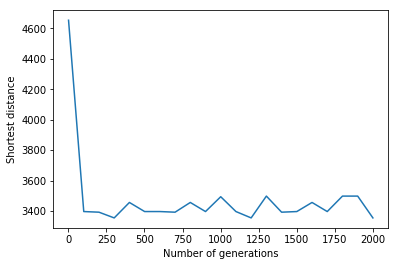

In [7]:
plt.plot(nb_generations, bests)
plt.xlabel("Number of generations")
plt.ylabel("Shortest distance")
plt.show()

### Testing the mutation rate

In [8]:
mutation_rates = np.arange(0, 0.05, 0.005)
bests = []
for mr in mutation_rates:
    for i in np.arange(10):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(1000)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(1.0)
        ga.setMutationRate(mr)
        ga.setPopulationSize(80)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8125.25(8672.54)/5686.81(5248.63)/6771.04(6771.04)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [6400.00(5248.63)/6400.00(5248.63)/6400.00(5248.63)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [5120.00(5315.75)/5120.00(5315.75)/5120.00(5315.75)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [5120.00(5315.75)/5120.00(5315.75)/5120.00(5315.75)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [5120.00(5315.75)/5120.00(5315.75)/5120.00(5315.75)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [5120.00(5315.75)/5120.00(5315.75)/5120.00(5315.75)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [5120.00(5315.75)/5120.00(5315.75)/5120.00(5315.75)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [5120.00(5315.75)/5120.00(5315.75)/5120.00(5315.75)]
Total time elapsed: 6.869 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8293.78(8536.52)/5404.52(5139.89)/6911.49(6911.49)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [6144.00(5139.89)/6144.00(5139.89)/6144.00(5139.89)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [6144.00(5139.89)/6144.00(5139.89)/6144.00(5139.89)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [6144.00(5139.89)/6144.00(5139.89)/6144.00(5139.8

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4288.54(5822.66)/3549.69(3497.97)/3573.79(3573.79)]
Total time elapsed: 7.255 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8052.36(8351.03)/5696.92(5471.40)/6710.30(6710.30)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4098.18(4879.50)/3406.39(3396.36)/3415.15(3415.15)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4112.28(4219.49)/3400.49(3396.36)/3426.90(3426.90)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4160.00(3396.36)/4160.00(3396.36)/4160.00(3396.36)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4134.81(5044.79)/3424.42(3396.36)/3445.67(3445.67)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4221.08(5818.78)/3480.51(3396.36)/3517.57(3517.57)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4157.67(4663.60)/3425.21(3396.36)/3464.73(3464.73)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4216.53(5843.71)/3478.36(3396.36)/3513.78(3513.78)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4110.87(5286.09)/3414.91(3396.36)/3425.72(3425.7

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4393.41(5797.58)/3613.76(3522.84)/3661.17(3661.17)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4352.71(5643.47)/3589.69(3522.84)/3627.26(3627.26)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4343.59(5047.60)/3570.57(3522.84)/3619.66(3619.66)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4401.80(6011.22)/3622.66(3522.84)/3668.17(3668.17)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4336.46(5434.13)/3577.63(3522.84)/3613.71(3613.71)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4368.92(5712.36)/3599.32(3522.84)/3640.77(3640.77)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4492.43(6011.22)/3670.77(3522.84)/3743.69(3743.69)]
Total time elapsed: 7.253 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8101.57(8340.75)/5370.97(5126.46)/6751.30(6751.30)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5300.15(5804.33)/4390.53(4375.55)/4416.79(4416.79)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4575.14(5946.16)/3743.21(3618.41)/3812.62(3812.6

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4511.17(6117.04)/3717.65(3628.66)/3759.31(3759.31)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4440.34(6051.08)/3677.73(3628.66)/3700.28(3700.28)]
Total time elapsed: 7.219 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8143.13(8767.35)/5700.44(5201.18)/6785.94(6785.94)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4357.45(6322.82)/3583.97(3456.13)/3631.21(3631.21)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4312.05(6297.62)/3556.90(3456.13)/3593.38(3593.38)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4487.09(6341.34)/3657.87(3456.13)/3739.24(3739.24)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4348.45(5878.55)/3569.85(3456.13)/3623.71(3623.71)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4320.88(5578.90)/3548.09(3456.13)/3600.73(3600.73)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4314.38(5730.87)/3548.45(3456.13)/3595.31(3595.31)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4450.59(6080.74)/3629.80(3456.13)/3708.82(3708.8

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4528.51(5694.33)/3728.68(3659.04)/3773.76(3773.76)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4715.99(6147.42)/3833.95(3659.04)/3929.99(3929.99)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4613.05(5933.78)/3776.08(3659.04)/3844.21(3844.21)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4547.96(5663.64)/3737.00(3659.04)/3789.97(3789.97)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4619.30(5823.74)/3775.18(3659.04)/3849.42(3849.42)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4529.09(6147.42)/3737.60(3659.04)/3774.24(3774.24)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4574.91(5823.74)/3754.28(3659.04)/3812.43(3812.43)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4534.56(5973.26)/3737.55(3659.04)/3778.80(3778.80)]
Total time elapsed: 7.020 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8131.11(8721.95)/5787.93(5357.17)/6775.93(6775.93)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4331.38(6551.82)/3571.86(3456.13)/3609.48(3609.4

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4403.74(7085.83)/3611.04(3396.36)/3669.79(3669.79)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4408.41(6097.93)/3589.63(3396.36)/3673.67(3673.67)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4417.22(6588.23)/3608.93(3396.36)/3681.02(3681.02)]
Total time elapsed: 7.236 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8167.50(7728.41)/5102.71(5652.21)/6806.25(6806.25)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4678.06(7141.35)/3840.84(3659.04)/3898.39(3898.39)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4600.25(6449.81)/3782.40(3659.04)/3833.54(3833.54)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4400.35(5822.66)/3609.47(3497.97)/3666.96(3666.96)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4501.63(6672.76)/3686.28(3497.97)/3751.36(3751.36)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4645.35(5945.32)/3731.84(3497.97)/3871.13(3871.13)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4407.31(5662.67)/3608.24(3497.97)/3672.76(3672.7

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5399.35(7042.46)/4403.76(4229.03)/4499.46(4499.46)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [5273.52(6396.19)/4321.90(4229.03)/4394.60(4394.60)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [5318.82(6360.44)/4338.87(4229.03)/4432.35(4432.35)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [5330.43(5742.73)/4296.55(4229.03)/4442.02(4442.02)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4413.04(6785.92)/3601.10(3354.52)/3677.53(3677.53)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4390.08(5872.94)/3558.00(3354.52)/3658.40(3658.40)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4363.31(5593.98)/3531.51(3354.52)/3636.09(3636.09)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4351.36(5964.57)/3541.90(3354.52)/3626.13(3626.13)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4433.28(5842.90)/3577.51(3354.52)/3694.40(3694.40)]
Total time elapsed: 7.394 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8329.42(8484.66)/5299.15(5115.53)/6941.18(6941.1

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4520.82(6045.04)/3644.63(3396.36)/3767.35(3767.35)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4502.27(6097.93)/3638.18(3396.36)/3751.89(3751.89)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4335.30(5818.78)/3541.88(3396.36)/3612.75(3612.75)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4422.39(5843.71)/3586.65(3396.36)/3685.33(3685.33)]
Total time elapsed: 7.237 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8178.15(8648.76)/5530.16(5086.51)/6815.13(6815.13)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4507.48(6476.09)/3655.68(3392.19)/3756.23(3756.23)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4575.15(6483.26)/3692.58(3392.19)/3812.62(3812.62)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4506.41(6310.70)/3648.60(3392.19)/3755.34(3755.34)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4454.17(5547.46)/3582.55(3392.19)/3711.81(3711.81)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4558.43(5880.57)/3650.35(3392.19)/3798.70(3798.7

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5410.93(6796.01)/4368.52(4152.60)/4509.11(4509.11)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5324.48(6280.96)/4300.16(4152.60)/4437.07(4437.07)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4541.22(5893.15)/3680.07(3493.79)/3784.35(3784.35)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4594.68(6400.20)/3729.10(3493.79)/3828.90(3828.90)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4531.05(5878.55)/3661.04(3456.13)/3775.87(3775.87)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4654.75(5944.51)/3720.15(3456.13)/3878.96(3878.96)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4453.03(5996.03)/3628.13(3456.13)/3710.86(3710.86)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4481.88(5944.51)/3640.66(3456.13)/3734.90(3734.90)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4698.79(6272.48)/3762.96(3456.13)/3915.66(3915.66)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4500.59(6657.74)/3674.55(3456.13)/3750.49(3750.49)]
Total time elapsed: 7.825 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4403.18(6296.17)/3581.37(3354.52)/3669.31(3669.31)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4424.11(6864.98)/3609.68(3354.52)/3686.76(3686.76)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4303.43(7752.03)/3546.31(3354.52)/3586.20(3586.20)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4566.30(6836.07)/3692.07(3354.52)/3805.25(3805.25)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4511.73(6466.36)/3647.19(3354.52)/3759.77(3759.77)]
Total time elapsed: 7.338 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7974.71(8653.92)/5232.28(4510.04)/6645.59(6645.59)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4866.58(6049.45)/3886.58(3640.27)/4055.48(4055.48)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4739.78(5882.41)/3823.29(3640.27)/3949.82(3949.82)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4571.15(5926.72)/3697.28(3497.97)/3809.29(3809.29)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4531.29(5772.71)/3670.88(3497.97)/3776.07(3776.0

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7991.03(8643.40)/5701.08(5231.77)/6659.19(6659.19)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4734.26(7223.80)/3803.06(3354.52)/3945.22(3945.22)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4596.15(6774.20)/3706.37(3354.52)/3830.12(3830.12)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4523.90(6229.69)/3642.59(3354.52)/3769.92(3769.92)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4664.94(6411.77)/3723.31(3354.52)/3887.45(3887.45)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4626.50(6444.45)/3706.24(3354.52)/3855.42(3855.42)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4556.86(6578.85)/3676.46(3354.52)/3797.38(3797.38)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4631.63(7050.47)/3737.48(3354.52)/3859.69(3859.69)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4543.01(7436.58)/3696.39(3354.52)/3785.84(3785.84)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4606.63(6037.52)/3669.73(3354.52)/3838.86(3838.86)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4592.30(5824.13)/3645.88(3354.52)/3826.92(3826.92)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4619.50(6543.53)/3708.10(3354.52)/3849.59(3849.59)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4551.09(5980.06)/3640.68(3354.52)/3792.58(3792.58)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4557.71(6877.28)/3688.67(3354.52)/3798.09(3798.09)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4687.11(6709.29)/3752.27(3354.52)/3905.93(3905.93)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4672.54(6246.95)/3715.32(3354.52)/3893.78(3893.78)]
Total time elapsed: 7.465 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7992.45(8539.34)/5254.68(4677.56)/6660.38(6660.38)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4837.48(6655.47)/3823.33(3354.52)/4031.24(4031.24)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4691.25(6919.26)/3765.24(3354.52)/3909.38(3909.38)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4681.28(6602.37)/3743.21(3354.52)/3901.07(3901.0

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4679.33(6169.75)/3726.63(3396.36)/3899.44(3899.44)]
Total time elapsed: 6.827 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8073.66(8136.15)/5057.92(4980.36)/6728.05(6728.05)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4686.30(6948.32)/3774.64(3396.36)/3905.25(3905.25)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4585.90(6751.95)/3710.67(3396.36)/3821.58(3821.58)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4587.66(5843.71)/3661.59(3396.36)/3823.05(3823.05)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4946.41(6509.00)/3871.39(3396.36)/4122.01(4122.01)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4596.60(6294.50)/3695.52(3396.36)/3830.50(3830.50)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4726.70(6063.07)/3737.70(3396.36)/3938.91(3938.91)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4775.50(6485.17)/3794.32(3396.36)/3979.58(3979.58)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4615.56(6256.90)/3702.72(3396.36)/3846.30(3846.3

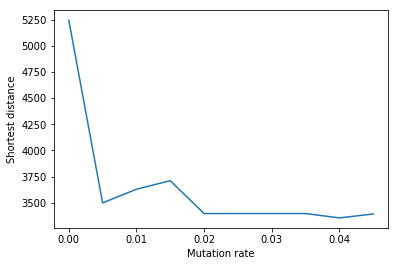

In [9]:
plt.plot(mutation_rates, bests)
plt.xlabel("Mutation rate")
plt.ylabel("Shortest distance")
plt.show()

In [10]:
population_sizes = np.arange(50, 201, 20)
bests = []
for ps in population_sizes:
    for i in np.arange(10):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(1000)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(1.0)
        ga.setMutationRate(0.02)
        ga.setPopulationSize(ps)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8225.45(8652.27)/6039.27(5785.45)/6854.55(6854.55)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4818.08(5871.85)/3931.85(3822.65)/4015.07(4015.07)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5004.99(6066.25)/4017.60(3822.65)/4170.83(4170.83)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4979.63(6311.03)/4024.11(3822.65)/4149.69(4149.69)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4836.89(6824.92)/3970.71(3822.65)/4030.74(4030.74)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4762.00(5268.44)/3879.40(3822.65)/3968.34(3968.34)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4818.32(6311.03)/3947.89(3822.65)/4015.27(4015.27)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4840.12(6095.56)/3950.98(3822.65)/4033.43(4033.43)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4838.58(6095.56)/3950.28(3822.65)/4032.15(4032.15)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4756.31(6311.03)/3916.00(3822.65)/3963.59(3963.59)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4216.92(5377.04)/3453.90(3354.52)/3514.10(3514.10)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4364.03(6668.18)/3568.99(3354.52)/3636.69(3636.69)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4206.44(5801.87)/3459.32(3354.52)/3505.37(3505.37)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4346.02(5753.88)/3530.93(3354.52)/3621.69(3621.69)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4300.98(5311.31)/3488.85(3354.52)/3584.15(3584.15)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4325.19(5490.20)/3508.84(3354.52)/3604.32(3604.32)]
Total time elapsed: 4.176 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8267.60(8641.75)/5726.01(5410.05)/6889.67(6889.67)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4350.96(5884.74)/3552.15(3396.36)/3625.80(3625.80)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4429.85(5843.71)/3590.28(3396.36)/3691.54(3691.54)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4421.71(5420.78)/3562.33(3396.36)/3684.76(3684.7

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4380.37(7077.50)/3587.30(3354.52)/3650.31(3650.31)]
Total time elapsed: 5.694 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8276.13(8687.57)/5526.14(5117.30)/6896.77(6896.77)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4398.44(5959.81)/3579.42(3396.36)/3665.36(3665.36)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4372.41(5560.36)/3549.64(3396.36)/3643.67(3643.67)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4488.04(5818.78)/3616.37(3396.36)/3740.04(3740.04)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4310.59(5795.72)/3528.33(3396.36)/3592.16(3592.16)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4178.78(5484.33)/3452.42(3396.36)/3482.32(3482.32)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4336.19(5561.06)/3532.92(3396.36)/3613.49(3613.49)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4406.80(5828.10)/3578.31(3396.36)/3672.33(3672.33)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4387.97(5671.10)/3562.15(3396.36)/3656.64(3656.6

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4297.87(5604.53)/3501.17(3354.52)/3581.56(3581.56)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4295.88(6119.15)/3516.35(3354.52)/3579.90(3579.90)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4394.32(5801.87)/3556.73(3354.52)/3661.94(3661.94)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4257.93(5646.69)/3482.75(3354.52)/3548.27(3548.27)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4285.85(6115.89)/3510.61(3354.52)/3571.54(3571.54)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4274.17(5679.21)/3492.07(3354.52)/3561.81(3561.81)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4326.32(5842.90)/3524.47(3354.52)/3605.26(3605.26)]
Total time elapsed: 7.251 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8087.95(8342.74)/5511.45(5279.24)/6739.95(6739.95)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4498.32(5750.89)/3708.03(3640.27)/3748.60(3748.60)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4633.52(6369.36)/3793.22(3640.27)/3861.27(3861.2

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4185.39(5776.94)/3447.20(3354.52)/3487.82(3487.82)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4229.14(5842.90)/3472.68(3354.52)/3524.29(3524.29)]
Total time elapsed: 7.263 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8147.30(8443.17)/5099.02(4730.69)/6789.42(6789.42)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4676.16(6160.42)/3800.95(3618.41)/3896.80(3896.80)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4618.19(5968.77)/3764.97(3618.41)/3848.49(3848.49)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4754.10(6424.33)/3851.28(3618.41)/3961.75(3961.75)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4589.48(6106.79)/3755.47(3618.41)/3824.56(3824.56)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4356.54(5536.85)/3578.47(3493.97)/3630.45(3630.45)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4354.22(5753.88)/3534.96(3354.52)/3628.52(3628.52)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4307.39(6145.53)/3523.50(3354.52)/3589.50(3589.5

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [5239.83(6408.16)/4292.28(4192.96)/4366.53(4366.53)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4364.16(6157.40)/3567.42(3396.36)/3636.80(3636.80)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4312.79(5575.42)/3522.30(3396.36)/3593.99(3593.99)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4331.92(5721.57)/3536.91(3396.36)/3609.94(3609.94)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4338.92(5884.74)/3545.84(3396.36)/3615.77(3615.77)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4485.73(6967.96)/3659.00(3396.36)/3738.11(3738.11)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4345.66(5561.06)/3537.36(3396.36)/3621.38(3621.38)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4306.29(5843.71)/3527.40(3396.36)/3588.57(3588.57)]
Total time elapsed: 8.845 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8191.52(8242.34)/5376.92(5322.97)/6826.27(6826.27)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4525.52(5893.15)/3672.64(3493.79)/3771.27(3771.2

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4390.31(5795.72)/3568.81(3396.36)/3658.59(3658.59)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4403.77(5810.88)/3576.07(3396.36)/3669.81(3669.81)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4463.71(6358.99)/3628.60(3396.36)/3719.76(3719.76)]
Total time elapsed: 10.439 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8024.74(8420.71)/5067.96(4588.53)/6687.28(6687.28)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4315.70(6703.99)/3540.43(3354.52)/3596.42(3596.42)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4247.08(5801.87)/3481.45(3354.52)/3539.23(3539.23)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4397.38(6893.58)/3594.13(3354.52)/3664.48(3664.48)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4314.03(5753.88)/3514.93(3354.52)/3595.02(3595.02)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4267.05(6900.40)/3513.06(3354.52)/3555.87(3555.87)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4276.70(5835.01)/3498.20(3354.52)/3563.91(3563.

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4356.49(6069.63)/3578.53(3456.13)/3630.41(3630.41)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4412.03(6091.19)/3609.52(3456.13)/3676.69(3676.69)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4411.70(6409.78)/3617.16(3456.13)/3676.42(3676.42)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4510.63(7158.37)/3691.91(3456.13)/3758.86(3758.86)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4441.35(6092.08)/3625.28(3456.13)/3701.13(3701.13)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4448.45(6156.94)/3631.11(3456.13)/3707.04(3707.04)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4420.87(6607.52)/3626.61(3456.13)/3684.05(3684.05)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4475.72(5903.48)/3635.86(3456.13)/3729.76(3729.76)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4558.01(6111.74)/3685.96(3456.13)/3798.34(3798.34)]
Total time elapsed: 13.593 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8331.30(8314.13)/5238.22(5259.30)/6942.75(6942.

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4420.48(5745.57)/3602.41(3456.13)/3683.73(3683.73)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4455.33(5855.49)/3623.84(3456.13)/3712.78(3712.78)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4464.51(5699.72)/3621.07(3456.13)/3720.43(3720.43)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4412.04(5903.48)/3603.86(3456.13)/3676.70(3676.70)]
Total time elapsed: 13.487 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8115.72(8731.85)/5360.65(4721.83)/6763.10(6763.10)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4644.00(7453.41)/3824.44(3659.04)/3870.00(3870.00)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4406.79(6163.84)/3620.93(3497.97)/3672.33(3672.33)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4502.92(5839.68)/3660.94(3497.97)/3752.43(3752.43)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4432.68(5897.33)/3628.21(3497.97)/3693.90(3693.90)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4455.19(5579.13)/3627.25(3497.97)/3712.66(3712.

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4333.72(5692.13)/3535.33(3392.19)/3611.43(3611.43)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4432.03(6412.09)/3611.53(3392.19)/3693.36(3693.36)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4368.46(5880.57)/3559.72(3392.19)/3640.39(3640.39)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4327.19(6868.51)/3558.73(3392.19)/3605.99(3605.99)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4311.59(7215.12)/3553.15(3392.19)/3592.99(3592.99)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4438.25(6390.92)/3614.37(3392.19)/3698.54(3698.54)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4333.49(5791.55)/3538.68(3392.19)/3611.24(3611.24)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4323.01(5742.55)/3531.70(3392.19)/3602.50(3602.50)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4284.82(6350.96)/3524.83(3392.19)/3570.68(3570.68)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4300.87(6807.17)/3541.39(3392.19)/3584.06(3584.06)]
Total time elapsed: 20.646 s

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4335.51(5818.78)/3541.98(3396.36)/3612.92(3612.92)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4334.11(6169.75)/3550.93(3396.36)/3611.75(3611.75)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4338.67(7831.02)/3577.96(3396.36)/3615.56(3615.56)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4432.72(5884.74)/3593.58(3396.36)/3693.93(3693.93)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4310.59(6148.15)/3537.12(3396.36)/3592.16(3592.16)]
Total time elapsed: 15.597 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8161.86(8628.86)/5249.30(4716.41)/6801.55(6801.55)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4388.51(5944.51)/3592.83(3456.13)/3657.09(3657.09)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4468.36(6044.83)/3637.81(3456.13)/3723.63(3723.63)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4459.67(6685.61)/3651.24(3456.13)/3716.39(3716.39)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4458.40(6004.77)/3631.20(3456.13)/3715.33(3715.

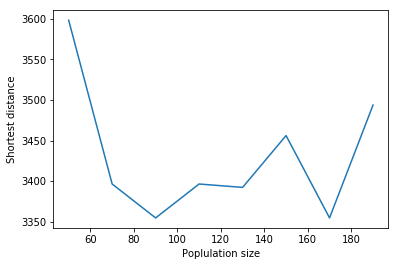

In [11]:
plt.plot(population_sizes, bests)
plt.xlabel("Poplulation size")
plt.ylabel("Shortest distance")
plt.show()

### Testing crossover rate

In [12]:
crossover_rates = np.arange(0.1, 1.1, 0.1)
bests = []
for cr in crossover_rates:
    for i in np.arange(20):
        setOfAlleles = GAllele.GAlleles(homogeneous=True)
        lst = [ i for i in xrange(len(coords)) ]
        a = GAllele.GAlleleList(lst)
        setOfAlleles.add(a)

        genome = G1DList.G1DList(len(coords))
        genome.setParams(allele=setOfAlleles)

        genome.evaluator.set(eval_func)
        genome.mutator.set(Mutators.G1DListMutatorSwap)
        genome.crossover.set(Crossovers.G1DListCrossoverOX)
        genome.initializator.set(G1DListTSPInitializator)

        ga = GSimpleGA.GSimpleGA(genome)
        ga.setGenerations(1000)
        ga.setMinimax(Consts.minimaxType["minimize"])
        ga.setCrossoverRate(cr)
        ga.setMutationRate(0.02)
        ga.setPopulationSize(80)

        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8096.83(8034.92)/4804.32(4893.46)/6747.35(6747.35)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4317.31(6146.21)/3529.08(3354.52)/3597.75(3597.75)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4245.84(5842.90)/3481.80(3354.52)/3538.20(3538.20)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4375.01(5842.90)/3549.16(3354.52)/3645.84(3645.84)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4306.36(5679.21)/3508.26(3354.52)/3588.64(3588.64)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4253.88(5776.94)/3484.43(3354.52)/3544.90(3544.90)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4213.65(5943.71)/3466.09(3354.52)/3511.38(3511.38)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4262.87(5842.90)/3491.02(3354.52)/3552.39(3552.39)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4359.74(6602.56)/3564.95(3354.52)/3633.12(3633.12)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4364.43(6423.42)/3563.28(3354.52)/3637.03(3637.03)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4479.74(6625.89)/3635.40(3354.52)/3733.12(3733.12)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4331.76(5629.26)/3518.54(3354.52)/3609.80(3609.80)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4460.88(6625.89)/3624.64(3354.52)/3717.40(3717.40)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4369.99(5477.29)/3527.73(3354.52)/3641.65(3641.65)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4340.46(5842.90)/3531.73(3354.52)/3617.05(3617.05)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4269.16(6713.41)/3511.84(3354.52)/3557.64(3557.64)]
Total time elapsed: 5.178 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8131.64(8425.96)/5559.75(5295.54)/6776.37(6776.37)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4538.45(5743.03)/3718.46(3617.20)/3782.04(3782.04)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4457.63(5739.97)/3678.93(3617.20)/3714.69(3714.69)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4653.36(5941.88)/3779.88(3617.20)/3877.80(3877.8

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4487.70(5719.93)/3608.47(3392.19)/3739.75(3739.75)]
Total time elapsed: 5.153 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8043.39(8535.52)/5297.13(4781.08)/6702.82(6702.82)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4630.74(6028.02)/3777.01(3628.66)/3858.95(3858.95)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4384.43(5986.55)/3573.09(3396.36)/3653.69(3653.69)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4300.34(5843.71)/3524.24(3396.36)/3583.62(3583.62)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4326.58(5884.74)/3539.33(3396.36)/3605.49(3605.49)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4449.09(6002.62)/3607.02(3396.36)/3707.58(3707.58)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4523.03(6479.01)/3665.48(3396.36)/3769.19(3769.19)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4433.65(5843.71)/3592.12(3396.36)/3694.71(3694.71)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4371.50(5506.99)/3546.55(3396.36)/3642.92(3642.9

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4623.46(5878.55)/3701.96(3456.13)/3852.89(3852.89)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4440.34(5780.82)/3613.44(3456.13)/3700.28(3700.28)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4456.77(5903.48)/3626.50(3456.13)/3713.98(3713.98)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4480.13(5440.64)/3612.15(3456.13)/3733.44(3733.44)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4357.65(5578.90)/3566.02(3456.13)/3631.37(3631.37)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4450.50(6230.58)/3634.44(3456.13)/3708.75(3708.75)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4392.59(5645.65)/3585.12(3456.13)/3660.49(3660.49)]
Total time elapsed: 5.344 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8047.25(8427.48)/5440.88(5082.21)/6706.04(6706.04)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5467.90(6283.36)/4470.22(4392.93)/4556.59(4556.59)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5337.70(6549.99)/4388.85(4308.12)/4448.08(4448.0

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4333.26(5799.00)/3538.81(3392.19)/3611.05(3611.05)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4271.71(5880.57)/3508.35(3392.19)/3559.76(3559.76)]
Total time elapsed: 5.318 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8199.44(8139.80)/5029.38(5108.09)/6832.87(6832.87)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4243.17(5855.62)/3493.41(3396.36)/3535.98(3535.98)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4379.42(6541.86)/3585.63(3396.36)/3649.52(3649.52)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4444.70(5884.74)/3599.45(3396.36)/3703.92(3703.92)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4268.33(5671.10)/3502.91(3396.36)/3556.94(3556.94)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4365.88(5843.71)/3558.44(3396.36)/3638.24(3638.24)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4339.29(5795.72)/3543.17(3396.36)/3616.07(3616.07)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4362.18(5506.99)/3542.40(3396.36)/3635.15(3635.1

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4488.78(5462.82)/3646.03(3522.84)/3740.65(3740.65)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4498.28(5922.20)/3670.71(3522.84)/3748.56(3748.56)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4456.52(5847.52)/3647.31(3522.84)/3713.77(3713.77)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4515.11(5712.36)/3670.06(3522.84)/3762.60(3762.60)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4456.21(5479.62)/3633.33(3522.84)/3713.51(3713.51)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4571.99(5925.13)/3706.54(3522.84)/3810.00(3810.00)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4309.16(5753.88)/3512.45(3354.52)/3590.96(3590.96)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4269.32(5776.94)/3492.60(3354.52)/3557.76(3557.76)]
Total time elapsed: 5.501 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7900.66(7998.07)/4905.43(4781.26)/6583.88(6583.88)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4699.69(6257.38)/3830.29(3659.04)/3916.41(3916.4

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4328.30(5561.06)/3529.19(3396.36)/3606.92(3606.92)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4678.21(5843.71)/3697.23(3396.36)/3898.50(3898.50)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4494.88(5843.71)/3620.98(3396.36)/3745.74(3745.74)]
Total time elapsed: 5.534 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8283.36(8183.21)/4920.55(5064.35)/6902.80(6902.80)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4285.52(5753.88)/3500.34(3354.52)/3571.27(3571.27)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4284.74(5776.94)/3500.67(3354.52)/3570.61(3570.61)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4148.10(5294.50)/3418.29(3354.52)/3456.75(3456.75)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4286.86(6472.52)/3518.71(3354.52)/3572.38(3572.38)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4436.00(6584.66)/3609.08(3354.52)/3696.66(3696.66)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4307.36(5739.90)/3511.03(3354.52)/3589.47(3589.4

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4355.15(5950.32)/3556.45(3396.36)/3629.29(3629.29)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4297.97(5945.43)/3525.49(3396.36)/3581.64(3581.64)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4375.94(5721.05)/3558.63(3396.36)/3646.62(3646.62)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4446.53(6016.41)/3606.32(3396.36)/3705.44(3705.44)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4269.47(5721.05)/3504.76(3396.36)/3557.89(3557.89)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4533.84(6184.86)/3658.31(3396.36)/3778.20(3778.20)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4513.57(6873.21)/3673.09(3396.36)/3761.31(3761.31)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4313.41(5561.06)/3522.07(3396.36)/3594.51(3594.51)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4524.15(5884.74)/3636.85(3396.36)/3770.13(3770.13)]
Total time elapsed: 5.626 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8074.65(8784.69)/5489.59(4835.73)/6728.87(6728.8

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4218.37(5484.33)/3472.84(3396.36)/3515.31(3515.31)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4288.70(5884.74)/3519.00(3396.36)/3573.92(3573.92)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4350.26(5844.02)/3550.43(3396.36)/3625.21(3625.21)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4237.81(5135.69)/3472.01(3396.36)/3531.51(3531.51)]
Total time elapsed: 5.731 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7950.80(8360.72)/5559.67(5229.91)/6625.67(6625.67)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4452.43(5965.55)/3605.66(3392.19)/3710.35(3710.35)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4428.53(6013.52)/3595.68(3392.19)/3690.44(3690.44)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4365.16(6654.09)/3578.43(3392.19)/3637.63(3637.63)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4273.53(5719.93)/3505.48(3392.19)/3561.27(3561.27)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4345.31(7026.71)/3572.41(3392.19)/3621.09(3621.0

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4254.30(6867.15)/3504.54(3354.52)/3545.25(3545.25)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4262.59(5930.27)/3493.12(3354.52)/3552.16(3552.16)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4194.94(6492.21)/3462.82(3354.52)/3495.78(3495.78)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4421.43(6492.21)/3597.91(3354.52)/3684.52(3684.52)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4298.65(5544.05)/3499.06(3354.52)/3582.21(3582.21)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4245.19(5544.05)/3473.08(3354.52)/3537.66(3537.66)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4286.93(6080.78)/3510.37(3354.52)/3572.44(3572.44)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4251.99(5842.90)/3485.14(3354.52)/3543.32(3543.32)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4143.24(4822.30)/3403.20(3354.52)/3452.70(3452.70)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4340.23(6972.85)/3560.31(3354.52)/3616.85(3616.85)]
Total time elapsed: 5.703 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4334.03(7577.33)/3564.85(3354.52)/3611.69(3611.69)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4220.23(5442.49)/3457.56(3354.52)/3516.86(3516.86)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4359.40(5629.26)/3531.55(3354.52)/3632.83(3632.83)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4292.31(5442.49)/3491.64(3354.52)/3576.93(3576.93)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4284.66(5842.90)/3502.66(3354.52)/3570.55(3570.55)]
Total time elapsed: 5.750 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8028.99(8473.93)/5270.44(4798.17)/6690.82(6690.82)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4432.11(5878.55)/3613.21(3456.13)/3693.43(3693.43)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4462.69(6037.81)/3634.62(3456.13)/3718.91(3718.91)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4346.67(5516.14)/3558.69(3456.13)/3622.23(3622.23)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4506.95(6288.23)/3666.91(3456.13)/3755.79(3755.7

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8195.76(8374.04)/5501.70(5328.36)/6829.80(6829.80)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4283.73(5819.58)/3501.47(3354.52)/3569.78(3569.78)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4306.84(5776.94)/3512.09(3354.52)/3589.03(3589.03)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4216.46(5679.21)/3462.05(3354.52)/3513.71(3513.71)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4398.62(5880.30)/3562.58(3354.52)/3665.52(3665.52)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4262.57(5971.80)/3494.12(3354.52)/3552.14(3552.14)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4374.72(5716.68)/3543.13(3354.52)/3645.60(3645.60)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4278.38(5629.26)/3492.49(3354.52)/3565.32(3565.32)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4394.78(5776.94)/3555.70(3354.52)/3662.32(3662.32)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4288.20(6472.52)/3519.52(3354.52)/3573.50(3573.50)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4425.86(6796.73)/3618.96(3396.36)/3688.22(3688.22)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4472.69(6285.27)/3630.82(3396.36)/3727.25(3727.25)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4603.07(6963.60)/3728.08(3396.36)/3835.89(3835.89)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4374.90(6834.70)/3588.73(3396.36)/3645.75(3645.75)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4244.04(5400.97)/3483.45(3396.36)/3536.70(3536.70)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4282.63(5013.36)/3483.62(3396.36)/3568.86(3568.86)]
Total time elapsed: 5.833 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8003.92(8198.70)/5443.69(5264.64)/6669.93(6669.93)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4489.77(6302.31)/3639.41(3392.19)/3741.48(3741.48)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4376.47(7125.46)/3593.61(3392.19)/3647.06(3647.06)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4355.35(5791.55)/3549.80(3392.19)/3629.46(3629.4

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4349.45(6903.72)/3573.18(3392.19)/3624.54(3624.54)]
Total time elapsed: 6.078 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8141.91(8317.34)/5229.79(5028.75)/6784.93(6784.93)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4601.14(6256.90)/3695.66(3396.36)/3834.28(3834.28)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4313.71(5843.71)/3531.34(3396.36)/3594.76(3594.76)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4412.03(5506.99)/3564.07(3396.36)/3676.69(3676.69)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4431.95(6048.80)/3600.18(3396.36)/3693.29(3693.29)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4371.22(7041.37)/3589.88(3396.36)/3642.68(3642.68)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4441.74(7062.96)/3634.26(3396.36)/3701.45(3701.45)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4262.98(6583.26)/3515.89(3396.36)/3552.49(3552.49)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4418.30(6177.74)/3597.67(3396.36)/3681.92(3681.9

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4526.31(5844.15)/3670.67(3493.79)/3771.92(3771.92)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4470.53(5685.70)/3637.39(3493.79)/3725.44(3725.44)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4433.58(6274.13)/3637.11(3493.79)/3694.65(3694.65)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4380.99(5709.00)/3595.11(3493.79)/3650.82(3650.82)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4368.62(5095.01)/3567.07(3493.79)/3640.51(3640.51)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4466.23(6667.38)/3664.22(3493.79)/3721.86(3721.86)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4395.50(5356.37)/3589.75(3493.79)/3662.92(3662.92)]
Total time elapsed: 5.938 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8052.86(8662.91)/5509.60(4963.65)/6710.72(6710.72)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4966.76(6234.13)/4068.02(3959.39)/4138.96(4138.96)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4660.48(6150.55)/3830.42(3728.13)/3883.73(3883.7

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4283.79(5776.94)/3500.18(3354.52)/3569.82(3569.82)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4391.60(5772.31)/3553.95(3354.52)/3659.67(3659.67)]
Total time elapsed: 6.120 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8118.78(8517.30)/5616.53(5278.09)/6765.65(6765.65)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4233.01(5734.46)/3472.21(3354.52)/3527.51(3527.51)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4225.15(5776.94)/3469.01(3354.52)/3520.96(3520.96)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4564.57(6874.50)/3692.50(3354.52)/3803.81(3803.81)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4354.10(6586.25)/3561.22(3354.52)/3628.41(3628.41)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4159.83(5896.44)/3434.57(3354.52)/3466.53(3466.53)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4371.21(5842.90)/3547.26(3354.52)/3642.68(3642.68)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4386.76(6238.56)/3570.40(3354.52)/3655.63(3655.6

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4372.87(6086.36)/3570.15(3396.36)/3644.06(3644.06)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4410.97(7042.64)/3614.79(3396.36)/3675.81(3675.81)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4421.47(5845.89)/3586.30(3396.36)/3684.56(3684.56)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4322.00(5884.74)/3536.89(3396.36)/3601.67(3601.67)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4461.11(6201.84)/3621.45(3396.36)/3717.59(3717.59)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4610.61(6593.59)/3717.67(3396.36)/3842.18(3842.18)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4305.05(5561.06)/3518.04(3396.36)/3587.55(3587.55)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4310.91(5843.71)/3529.85(3396.36)/3592.42(3592.42)]
Total time elapsed: 5.830 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8185.00(8412.88)/5605.56(5402.55)/6820.83(6820.83)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4806.84(5812.05)/3917.70(3807.28)/4005.70(4005.7

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4396.86(6864.55)/3601.80(3392.19)/3664.05(3664.05)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4404.26(6253.46)/3591.21(3392.19)/3670.22(3670.22)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4307.50(5568.61)/3517.98(3392.19)/3589.58(3589.58)]
Total time elapsed: 6.275 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8207.69(8440.13)/5158.98(4873.40)/6839.74(6839.74)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4413.52(6403.62)/3618.07(3456.13)/3677.93(3677.93)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4433.71(6761.88)/3637.27(3456.13)/3694.76(3694.76)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4462.54(5855.49)/3627.36(3456.13)/3718.78(3718.78)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4507.75(6144.23)/3661.96(3456.13)/3756.46(3756.46)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4443.39(6191.10)/3629.40(3456.13)/3702.82(3702.82)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4613.03(6008.26)/3706.32(3456.13)/3844.19(3844.1

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4208.90(4875.95)/3429.05(3354.52)/3507.42(3507.42)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4338.44(6048.64)/3537.85(3354.52)/3615.36(3615.36)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4253.93(5801.87)/3485.13(3354.52)/3544.94(3544.94)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4421.37(6960.43)/3610.25(3354.52)/3684.47(3684.47)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4424.29(6351.90)/3594.94(3354.52)/3686.91(3686.91)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4359.72(5629.26)/3531.69(3354.52)/3633.10(3633.10)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4326.90(5928.12)/3527.74(3354.52)/3605.75(3605.75)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4315.30(5480.36)/3503.88(3354.52)/3596.08(3596.08)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4368.47(6874.50)/3576.03(3354.52)/3640.39(3640.39)]
Total time elapsed: 6.177 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7934.06(8951.21)/5739.07(5067.83)/6611.72(6611.7

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4225.08(4883.87)/3456.56(3396.36)/3520.90(3520.90)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4349.91(5795.72)/3548.59(3396.36)/3624.93(3624.93)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4376.21(5431.65)/3544.48(3396.36)/3646.84(3646.84)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4323.81(5843.71)/3536.66(3396.36)/3603.17(3603.17)]
Total time elapsed: 6.263 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8077.14(8019.52)/4984.65(5059.39)/6730.95(6730.95)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4416.14(5953.88)/3574.72(3354.52)/3680.12(3680.12)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4308.62(6785.54)/3537.47(3354.52)/3590.51(3590.51)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4263.46(5477.29)/3479.64(3354.52)/3552.88(3552.88)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4193.81(5611.08)/3448.49(3354.52)/3494.84(3494.84)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4342.65(5663.71)/3525.31(3354.52)/3618.87(3618.8

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4339.16(6248.89)/3544.15(3354.52)/3615.96(3615.96)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4238.36(5378.94)/3464.10(3354.52)/3531.96(3531.96)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4227.69(5679.21)/3467.99(3354.52)/3523.07(3523.07)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4348.39(5801.87)/3534.11(3354.52)/3623.66(3623.66)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4377.96(5824.66)/3549.80(3354.52)/3648.30(3648.30)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4284.46(5801.87)/3501.31(3354.52)/3570.39(3570.39)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4469.77(5842.90)/3594.57(3354.52)/3724.81(3724.81)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4501.54(6820.00)/3654.28(3354.52)/3751.28(3751.28)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4214.28(5480.36)/3455.74(3354.52)/3511.90(3511.90)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4304.58(6432.16)/3528.49(3354.52)/3587.15(3587.15)]
Total time elapsed: 6.366 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4577.93(5782.13)/3764.55(3685.02)/3814.94(3814.94)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4684.26(6306.81)/3832.56(3685.02)/3903.55(3903.55)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4725.41(6084.38)/3845.08(3685.02)/3937.84(3937.84)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4720.31(6107.44)/3843.63(3685.02)/3933.59(3933.59)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4700.01(6132.37)/3834.78(3685.02)/3916.68(3916.68)]
Total time elapsed: 6.207 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8061.24(8755.44)/5611.78(5040.36)/6717.70(6717.70)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4410.00(5801.87)/3564.25(3354.52)/3675.00(3675.00)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4469.51(5480.36)/3567.58(3354.52)/3724.59(3724.59)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4468.80(5842.90)/3594.13(3354.52)/3724.00(3724.00)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4251.73(5294.50)/3466.81(3354.52)/3543.11(3543.1

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8040.55(8977.86)/5494.40(4650.83)/6700.46(6700.46)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4518.18(5756.72)/3703.77(3602.81)/3765.15(3765.15)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4619.95(5763.04)/3750.49(3602.81)/3849.96(3849.96)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4663.35(6695.53)/3807.75(3602.81)/3886.13(3886.13)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4348.17(5814.61)/3546.98(3392.19)/3623.48(3623.48)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4345.88(6381.81)/3561.38(3392.19)/3621.57(3621.57)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4350.03(5607.39)/3539.87(3392.19)/3625.02(3625.02)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4296.43(5540.87)/3511.63(3392.19)/3580.36(3580.36)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4355.47(5742.55)/3548.01(3392.19)/3629.56(3629.56)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4314.87(5865.20)/3531.23(3392.19)/3595.72(3595.72)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4142.07(4498.05)/3387.59(3354.52)/3451.73(3451.73)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4312.84(6900.37)/3541.96(3354.52)/3594.03(3594.03)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4376.73(6218.44)/3564.22(3354.52)/3647.27(3647.27)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4411.71(5679.21)/3558.25(3354.52)/3676.43(3676.43)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4264.78(6432.16)/3504.72(3354.52)/3553.98(3553.98)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4304.59(5842.90)/3513.17(3354.52)/3587.16(3587.16)]
Total time elapsed: 6.827 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8071.53(8131.08)/5230.78(5164.57)/6726.28(6726.28)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4472.81(5739.07)/3651.56(3522.84)/3727.34(3727.34)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4664.00(7230.84)/3802.10(3522.84)/3886.67(3886.67)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4475.79(5922.20)/3659.40(3522.84)/3729.83(3729.8

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4410.14(6110.92)/3591.00(3396.36)/3675.12(3675.12)]
Total time elapsed: 6.853 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8145.78(8227.34)/4834.68(4717.32)/6788.15(6788.15)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4438.73(6831.95)/3626.51(3392.19)/3698.94(3698.94)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4434.82(6323.07)/3610.30(3392.19)/3695.68(3695.68)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4412.16(5814.61)/3578.90(3392.19)/3676.80(3676.80)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4368.78(5719.93)/3553.64(3392.19)/3640.65(3640.65)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4344.75(5719.93)/3541.83(3392.19)/3620.62(3620.62)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4430.07(5894.67)/3591.33(3392.19)/3691.72(3691.72)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4363.24(6482.80)/3573.74(3392.19)/3636.03(3636.03)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4321.80(5584.10)/3525.45(3392.19)/3601.50(3601.5

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4532.31(5945.32)/3679.75(3497.97)/3776.92(3776.92)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4583.24(6176.46)/3715.21(3497.97)/3819.36(3819.36)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4546.67(5945.32)/3686.66(3497.97)/3788.89(3788.89)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4512.63(5986.35)/3671.81(3497.97)/3760.53(3760.53)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4647.99(6639.52)/3768.21(3497.97)/3873.32(3873.32)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4635.88(6934.01)/3771.33(3497.97)/3863.23(3863.23)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4511.01(6244.49)/3680.16(3497.97)/3759.18(3759.18)]
Total time elapsed: 7.038 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8134.72(8749.83)/5493.78(4910.72)/6778.93(6778.93)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4254.66(5842.90)/3486.59(3354.52)/3545.55(3545.55)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4334.17(6408.11)/3545.34(3354.52)/3611.81(3611.8

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4387.05(5561.06)/3556.28(3396.36)/3655.87(3655.87)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4372.45(5561.06)/3549.70(3396.36)/3643.71(3643.71)]
Total time elapsed: 7.118 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8003.07(8273.04)/4998.69(4660.56)/6669.22(6669.22)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4779.66(6473.59)/3914.96(3770.18)/3983.05(3983.05)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4669.49(6132.37)/3819.63(3685.02)/3891.24(3891.24)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4589.25(6173.40)/3779.00(3685.02)/3824.38(3824.38)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4633.98(6009.71)/3798.15(3685.02)/3861.65(3861.65)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4531.31(5873.17)/3712.11(3598.43)/3776.09(3776.09)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4566.62(5923.11)/3731.08(3598.43)/3805.51(3805.51)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4491.32(6045.78)/3695.85(3598.43)/3742.77(3742.7

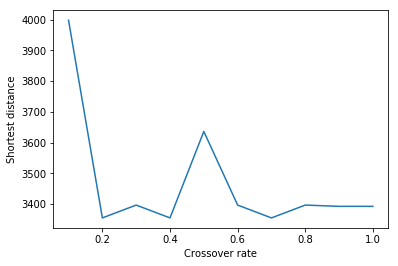

In [13]:
plt.plot(crossover_rates, bests)
plt.xlabel("Crossover rate")
plt.ylabel("Shortest distance")
plt.show()

### Testing the selection method

In [14]:
best_length = []
for i in np.arange(30):
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(coords)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(coords))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(1000)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(0.8)
    ga.setMutationRate(0.02)
    ga.setPopulationSize(80)
    # ga.selector.set(Selectors.GRouletteWheel)
    # ga.selector.set(Selectors.GTournamentSelector)
    ga.selector.set(Selectors.GRankSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(best_length)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7947.94(8093.59)/5081.32(4911.78)/6623.28(6623.28)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4464.13(5803.23)/3602.99(3392.19)/3720.11(3720.11)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4501.64(5742.55)/3616.03(3392.19)/3751.37(3751.37)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4245.36(6608.10)/3504.25(3392.19)/3537.80(3537.80)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4348.03(5846.57)/3548.00(3392.19)/3623.35(3623.35)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4424.91(5803.52)/3584.53(3392.19)/3687.43(3687.43)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4329.50(5880.57)/3539.42(3392.19)/3607.92(3607.92)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4448.70(5791.55)/3595.17(3392.19)/3707.25(3707.25)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4287.87(5103.89)/3488.70(3392.19)/3573.23(3573.23)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4316.42(5742.55)/3528.34(3392.19)/3597.02(3597.02)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4378.76(5867.53)/3597.92(3493.79)/3648.97(3648.97)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4428.12(5984.13)/3626.94(3493.79)/3690.10(3690.10)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4494.11(6637.87)/3680.02(3493.79)/3745.09(3745.09)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4592.54(6611.13)/3735.48(3493.79)/3827.12(3827.12)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4415.41(5877.83)/3617.34(3493.79)/3679.51(3679.51)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4458.02(5709.00)/3632.58(3493.79)/3715.01(3715.01)]
Total time elapsed: 7.647 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8083.53(8361.11)/5481.53(5223.01)/6736.27(6736.27)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4389.26(5884.74)/3571.87(3396.36)/3657.72(3657.72)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4326.05(5671.10)/3532.22(3396.36)/3605.04(3605.04)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4456.90(5893.85)/3605.81(3396.36)/3714.08(3714.0

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4325.13(6625.59)/3544.69(3354.52)/3604.28(3604.28)]
Total time elapsed: 6.590 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7955.80(8255.48)/5585.16(5349.05)/6629.83(6629.83)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4269.31(5090.69)/3463.42(3354.52)/3557.76(3557.76)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4328.57(5776.94)/3523.15(3354.52)/3607.14(3607.14)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4323.89(6243.43)/3535.35(3354.52)/3603.24(3603.24)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4502.05(7097.04)/3662.62(3354.52)/3751.71(3751.71)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4320.05(5724.26)/3516.82(3354.52)/3600.04(3600.04)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4323.88(5753.88)/3519.90(3354.52)/3603.24(3603.24)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4342.91(5753.88)/3529.39(3354.52)/3619.09(3619.09)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4234.31(6820.08)/3491.27(3354.52)/3528.59(3528.5

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4304.73(6267.82)/3535.06(3392.19)/3587.28(3587.28)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4369.18(5791.55)/3556.74(3392.19)/3640.98(3640.98)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4316.89(5712.32)/3527.59(3392.19)/3597.41(3597.41)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4460.40(6014.45)/3611.90(3392.19)/3717.00(3717.00)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4331.18(5584.10)/3529.95(3392.19)/3609.32(3609.32)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4306.61(6419.50)/3538.98(3392.19)/3588.84(3588.84)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4333.81(5880.57)/3541.69(3392.19)/3611.50(3611.50)]
Total time elapsed: 6.636 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8158.52(8393.12)/5111.84(4820.78)/6798.77(6798.77)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4339.80(5843.71)/3545.01(3396.36)/3616.50(3616.50)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4352.13(5940.08)/3554.53(3396.36)/3626.77(3626.7

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4410.20(7752.03)/3617.35(3354.52)/3675.16(3675.16)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4225.65(5842.90)/3470.76(3354.52)/3521.37(3521.37)]
Total time elapsed: 6.663 seconds.
3426.449998101632


In [15]:
best_length = []
for i in np.arange(30):
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(coords)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(coords))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(1000)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(0.8)
    ga.setMutationRate(0.02)
    ga.setPopulationSize(80)
    ga.selector.set(Selectors.GTournamentSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8077.43(8045.89)/4896.64(4939.63)/6731.19(6731.19)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8905.47(8593.50)/4279.24(4939.63)/7421.22(7421.22)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8864.77(8514.02)/4023.74(4822.26)/7387.31(7387.31)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [8778.46(8380.94)/3892.19(4822.26)/7315.38(7315.38)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [8662.26(8382.19)/4038.79(4655.64)/7218.55(7218.55)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8563.56(8492.72)/4526.09(4655.64)/7136.30(7136.30)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8896.15(8687.75)/4204.63(4655.64)/7413.45(7413.45)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8711.93(8363.51)/3833.41(4655.64)/7259.94(7259.94)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8959.29(8676.15)/3998.02(4655.64)/7466.08(7466.08)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8841.79(8423.76)/3581.44(4655.64)/7368.16(7368.16)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8750.45(8424.94)/3494.29(4341.92)/7292.04(7292.04)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8602.95(8444.53)/3990.75(4341.92)/7169.13(7169.13)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8696.06(8283.46)/3185.89(4341.92)/7246.72(7246.72)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8975.75(8725.51)/3711.58(4341.92)/7479.79(7479.79)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8629.52(8615.30)/4313.46(4341.92)/7191.27(7191.27)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8824.31(8580.20)/3742.56(4341.92)/7353.59(7353.59)]
Total time elapsed: 10.764 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8222.08(8289.97)/4822.35(4721.81)/6851.74(6851.74)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8738.77(8576.32)/4400.37(4721.81)/7282.31(7282.31)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8661.15(8313.52)/3701.70(4548.41)/7217.62(7217.62)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [8756.40(8515.28)/4004.43(4548.41)/7297.00(7297.

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8767.72(8595.94)/3224.12(3704.01)/7306.44(7306.44)]
Total time elapsed: 8.503 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8115.03(8923.60)/5813.41(5246.00)/6762.53(6762.53)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8893.21(8731.10)/4406.75(4735.31)/7411.01(7411.01)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8841.03(8708.27)/4474.68(4735.31)/7367.53(7367.53)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [8712.68(8485.51)/4211.28(4688.30)/7260.56(7260.56)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [8950.80(8865.97)/4324.65(4502.90)/7459.00(7459.00)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8800.31(8428.16)/3473.68(4453.06)/7333.59(7333.59)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8806.65(8585.80)/3941.96(4453.06)/7338.87(7338.87)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8760.32(8283.25)/2905.21(4341.29)/7300.27(7300.27)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8680.34(8111.79)/2468.75(4341.29)/7233.62(7233.6

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [8697.88(8227.07)/3498.52(4716.34)/7248.23(7248.23)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8613.43(8259.60)/3477.77(4389.75)/7177.86(7177.86)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8776.61(8450.65)/3551.35(4389.75)/7313.84(7313.84)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8781.88(8589.31)/3946.08(4389.75)/7318.23(7318.23)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8860.33(8390.62)/2993.30(4389.75)/7383.61(7383.61)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8836.36(8356.56)/2952.71(4389.75)/7363.64(7363.64)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8946.13(8453.35)/2876.57(4389.75)/7455.11(7455.11)]
Total time elapsed: 7.879 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8278.65(8352.83)/5413.19(5333.31)/6898.87(6898.87)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8854.56(8560.34)/4160.59(4802.19)/7378.80(7378.80)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8653.44(8547.51)/4280.35(4495.61)/7211.20(7211.2

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8755.09(8429.46)/2878.32(3864.15)/7295.91(7295.91)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8847.22(8402.56)/2349.30(3864.15)/7372.68(7372.68)]
Total time elapsed: 7.876 seconds.
4182.12233702586


In [16]:
print(np.mean(best_length))

4182.12233702586


In [17]:
best_length = []
for i in np.arange(30):
    setOfAlleles = GAllele.GAlleles(homogeneous=True)
    lst = [ i for i in xrange(len(coords)) ]
    a = GAllele.GAlleleList(lst)
    setOfAlleles.add(a)

    genome = G1DList.G1DList(len(coords))
    genome.setParams(allele=setOfAlleles)

    genome.evaluator.set(eval_func)
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(1000)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(0.8)
    ga.setMutationRate(0.02)
    ga.setPopulationSize(80)
    ga.selector.set(Selectors.GRouletteWheel)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8117.92(8066.49)/4436.87(4525.37)/6764.94(6764.94)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7693.46(8067.19)/4596.08(4067.03)/6411.22(6411.22)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7309.70(8091.12)/4667.40(3754.01)/6091.42(6091.42)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7627.79(7842.89)/4130.62(3754.01)/6356.49(6356.49)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7728.58(8121.52)/4338.01(3696.64)/6440.49(6440.49)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7735.66(8050.17)/4170.77(3615.65)/6446.38(6446.38)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7694.15(8043.40)/4008.94(3354.52)/6411.79(6411.79)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7554.05(7928.24)/4028.24(3354.52)/6295.04(6295.04)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7507.81(7701.00)/3742.64(3354.52)/6256.51(6256.51)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7506.05(7636.16)/3627.77(3354.52)/6255.05(6255.05)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7238.03(7571.06)/4101.94(3569.18)/6031.69(6031.69)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7320.55(7635.75)/4088.87(3569.18)/6100.45(6100.45)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7469.74(7664.27)/3862.96(3493.93)/6224.79(6224.79)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7012.21(7874.97)/4457.81(3434.85)/5843.51(5843.51)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7241.10(7615.46)/4019.38(3394.38)/6034.25(6034.25)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7365.99(8026.60)/4328.43(3354.52)/6138.33(6138.33)]
Total time elapsed: 6.935 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8178.59(8314.28)/5502.46(5371.75)/6815.49(6815.49)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7623.32(8262.63)/4664.52(3815.05)/6352.77(6352.77)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7911.16(8316.42)/4362.18(3676.64)/6592.64(6592.64)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7421.58(7742.04)/4192.70(3676.64)/6184.65(6184.6

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7572.46(8110.78)/4238.32(3354.52)/6310.38(6310.38)]
Total time elapsed: 6.952 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8119.98(8055.03)/4930.82(5018.92)/6766.65(6766.65)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7456.37(7890.19)/4443.93(3826.14)/6213.64(6213.64)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7539.42(7972.55)/4295.43(3610.39)/6282.85(6282.85)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7359.79(7672.54)/4100.77(3582.58)/6133.16(6133.16)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7371.15(7741.96)/4079.65(3456.98)/6142.62(6142.62)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7460.63(7672.01)/3770.45(3354.52)/6217.20(6217.20)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7542.65(7426.98)/3057.50(3354.52)/6285.54(6285.54)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7543.36(8102.42)/4256.88(3354.52)/6286.13(6286.13)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7689.71(7949.05)/3868.43(3354.52)/6408.09(6408.0

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7591.40(7782.76)/3851.08(3476.75)/6326.17(6326.17)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7780.87(7944.59)/3738.77(3392.19)/6484.06(6484.06)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7425.88(7872.32)/4105.72(3354.52)/6188.24(6188.24)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7635.82(7963.91)/3971.20(3354.52)/6363.18(6363.18)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7424.37(8406.00)/4607.51(3354.52)/6186.97(6186.97)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7281.53(7691.11)/4039.21(3354.52)/6067.94(6067.94)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7353.53(8058.70)/4367.45(3354.52)/6127.94(6127.94)]
Total time elapsed: 6.963 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8109.17(8119.69)/5344.23(5333.23)/6757.64(6757.64)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7621.92(7492.25)/3552.87(3838.54)/6351.60(6351.60)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7394.20(7690.56)/4226.63(3761.23)/6161.83(6161.8

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7310.61(7511.83)/3742.57(3354.52)/6092.17(6092.17)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7485.88(7720.88)/3811.58(3354.52)/6238.24(6238.24)]
Total time elapsed: 6.985 seconds.
3393.3142708240002


### Plot the path

In [21]:
setOfAlleles = GAllele.GAlleles(homogeneous=True)
lst = [ i for i in xrange(len(coords)) ]
a = GAllele.GAlleleList(lst)
setOfAlleles.add(a)

genome = G1DList.G1DList(len(coords))
genome.setParams(allele=setOfAlleles)

genome.evaluator.set(eval_func)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.crossover.set(Crossovers.G1DListCrossoverOX)
genome.initializator.set(G1DListTSPInitializator)

ga = GSimpleGA.GSimpleGA(genome)
ga.setGenerations(1000)
ga.setMinimax(Consts.minimaxType["minimize"])
ga.setCrossoverRate(0.8)
ga.setMutationRate(0.02)
ga.setPopulationSize(80)
ga.selector.set(Selectors.GRouletteWheel)

ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8202.83(8364.67)/4905.82(4677.37)/6835.69(6835.69)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7435.02(7742.52)/4397.59(3951.34)/6195.85(6195.85)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7673.55(8260.31)/4492.18(3619.35)/6394.63(6394.63)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7387.97(7518.40)/3733.61(3476.95)/6156.64(6156.64)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7525.88(7821.78)/3994.28(3457.05)/6271.57(6271.57)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7829.57(8078.04)/3913.46(3416.26)/6524.64(6524.64)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7576.36(8078.20)/4223.05(3392.19)/6313.63(6313.63)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7515.20(7778.01)/3890.02(3392.19)/6262.66(6262.66)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7188.28(7243.59)/3506.83(3392.19)/5990.24(5990.24)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [6933.97(7790.10)/4385.98(3354.52)/5778.31(5778.31)]
Gen. 1000 (100.00%): Max/Min/Avg 

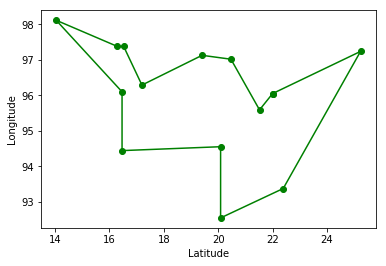

In [22]:
res_lat = []
res_lon = []
best.append(best[0])
for city_index in best:
    res_lat.append(LAT[city_index])
    res_lon.append(LON[city_index])
    
plt.plot(res_lat, res_lon, '-o', color='g')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()